In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
import coffea.util as util
import time
import json
import os
import copy
from hist import Hist
sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils
import mplhep as hep
import utils
hep.style.use("CMS")
plt.rcParams['font.size'] = 16.0
from matplotlib.colors import Normalize, LogNorm
from copy import deepcopy
from tqdm import tqdm
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import colormaps
cmap_sig = list(colormaps['tab10'].colors) + list(colormaps['Dark2'].colors)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
hcs = ptools.histContainer("skimmed_signal_histos_cuts_vtx_v8.coffea")
hcb = ptools.histContainer("skimmed_bkg_histos_cuts_vtx_v8.coffea",bkg=True)
dfs = utils.get_dict_fromCutflow(hcs.load('cutflow'))
dfs['legend'] = dfs.apply(ptools.make_label,axis=1)
selected_signals = ["sig_2018_Mchi-10p5_dMchi-1p0_ctau-1",
                    "sig_2018_Mchi-52p5_dMchi-5p0_ctau-10",
                    "sig_2018_Mchi-22p0_dMchi-4p0_ctau-1",
                    "sig_2018_Mchi-44p0_dMchi-8p0_ctau-100"]
selected_labels = [dfs[dfs.name==s].legend.item() for s in selected_signals]

# Plots - sig only

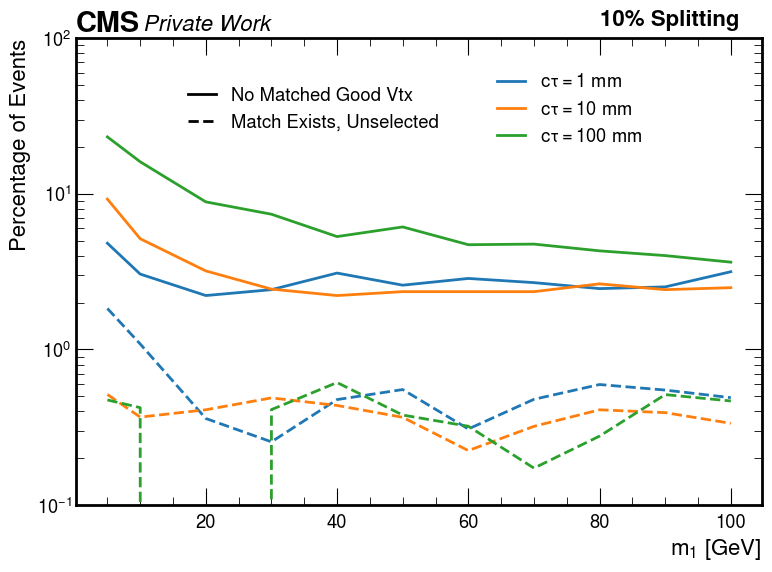

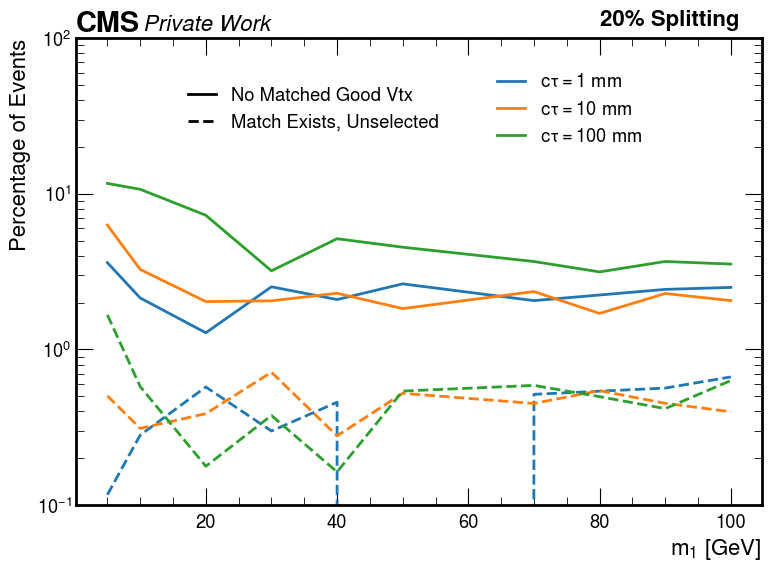

In [4]:
deltas = [0.1,0.2]
m1s = [5,10,20,30,40,50,60,70,80,90,100]
cts = [1,10,100]
hcut = "cut6"
h = hcs.load("selMatch_vs_hasMatch")[{"cut":hcut}]
cmap = list(colormaps['tab10'].colors)
for d in deltas:
    plt.figure(figsize=(8,6))
    lines_ct = []
    for i,ct in enumerate(cts):
        match_sel = []
        match_unsel = []
        noMatch = []
        ms = []
        for m1 in m1s:
            cut = (dfs.m1 == m1) & (dfs.ctau == ct) & (dfs.delta == d)
            if len(dfs[cut]) == 0:
                continue
            name = dfs[cut]['name'][0]
            ms.append(m1)
            hsel = h[{"samp":name}]
            hsel_fracs = 100*hsel.values()/hsel.values().sum()
            match_sel.append(hsel_fracs[1,1])
            noMatch.append(hsel_fracs[0,0])
            match_unsel.append(hsel_fracs[0,1])
        #plt.plot(ms,match_sel,color="C0",lw=2,linestyle='-')
        plt.plot(ms,match_unsel,color=cmap[i],lw=2,linestyle='--')
        plt.plot(ms,noMatch,color=cmap[i],lw=2,linestyle='-')
        lines_ct.append(Line2D([],[],lw=2,linestyle='-',color=cmap[i],label=rf"$c\tau = {ct}$ mm"))
    lines_style = [Line2D([],[],lw=2,linestyle='-',color='k',label=rf"No Matched Good Vtx"),
                   Line2D([],[],lw=2,linestyle='--',color='k',label=rf"Match Exists, Unselected")]
    plt.ylim([1e-1,100])
    leg = plt.legend(handles=lines_ct,loc=(0.6,0.75))
    plt.gca().add_artist(leg)
    plt.legend(handles=lines_style,loc=(0.15,0.78))
    plt.ylabel("Percentage of Events")
    plt.xlabel(r"$m_1$ [GeV]")
    hep.cms.text("Private Work")
    plt.text(80,120,f"{int(100*d)}% Splitting",fontweight='bold')
    plt.yscale('log')
    plt.tight_layout()
    plt.savefig(f"plots_vtx_v8/signal_vtxPurity/purity_delta{int(100*d)}_{hcut}.pdf")

# Plots - BDT inputs etc

In [17]:
cuts = ['cut5','cut6']
cutDesc = hcs.load('cutDesc')

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


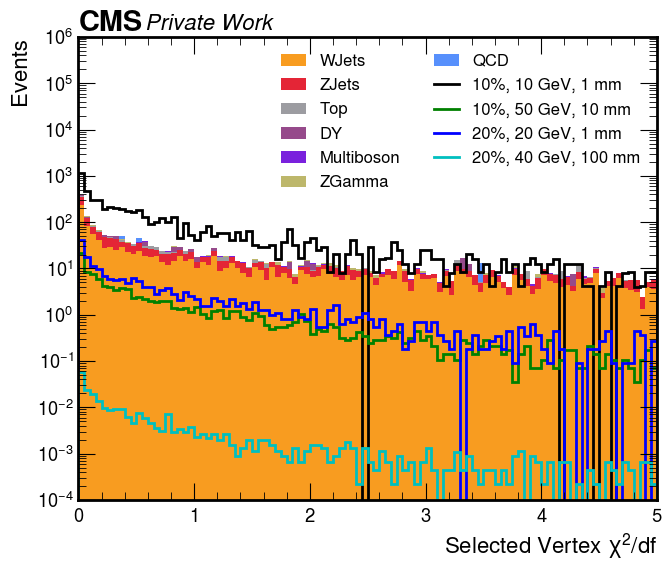

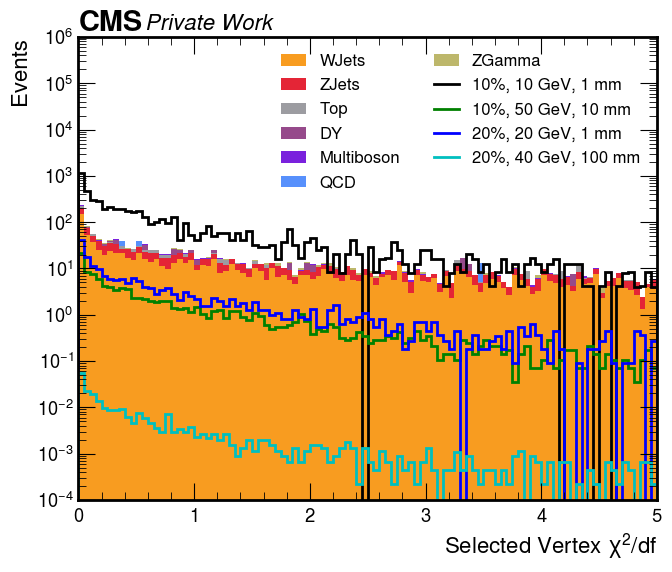

In [6]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = "sel_vtx_chi2_selectedSignals"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = "Selected Vertex $\chi^2$/df"
    title = None
    hname = "sel_vtx_chi2"
    xlim = [0,5]
    ylim = [1e-4,1e6]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


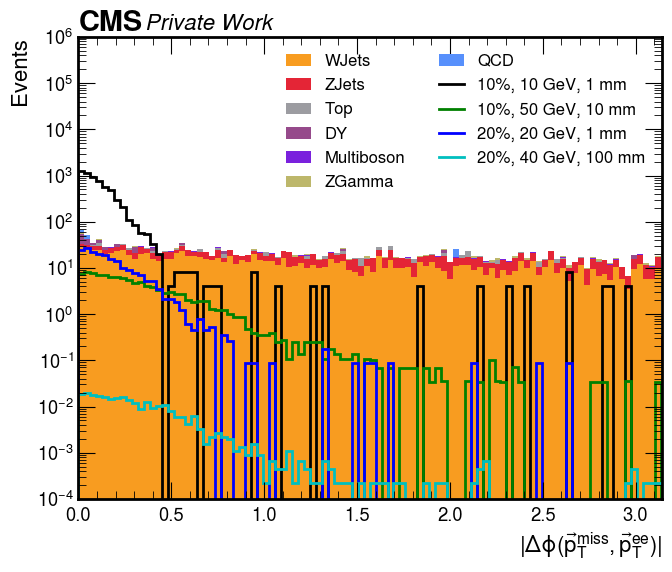

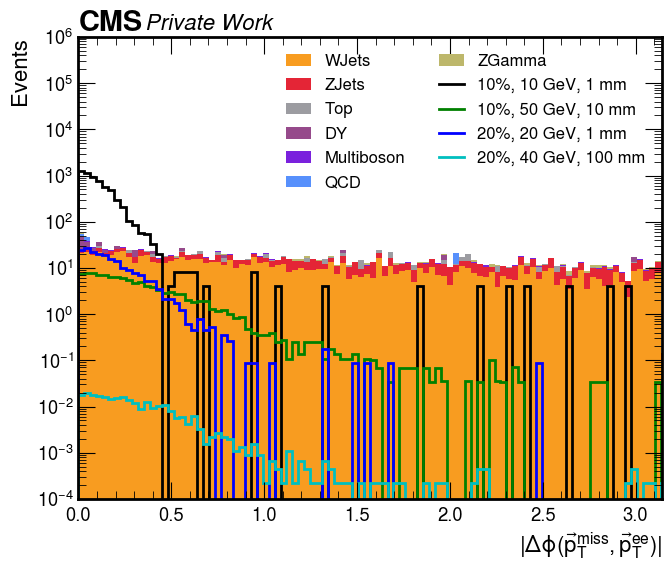

In [7]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"sel_vtx_METdPhi"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$|\Delta \phi (\vec{p}_T^\mathrm{miss},\vec{p}_T^\mathrm{ee})|$"
    title = None
    hname = "sel_vtx_METdPhi"
    xlim = [0,np.pi]
    ylim = [1e-4,1e6]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


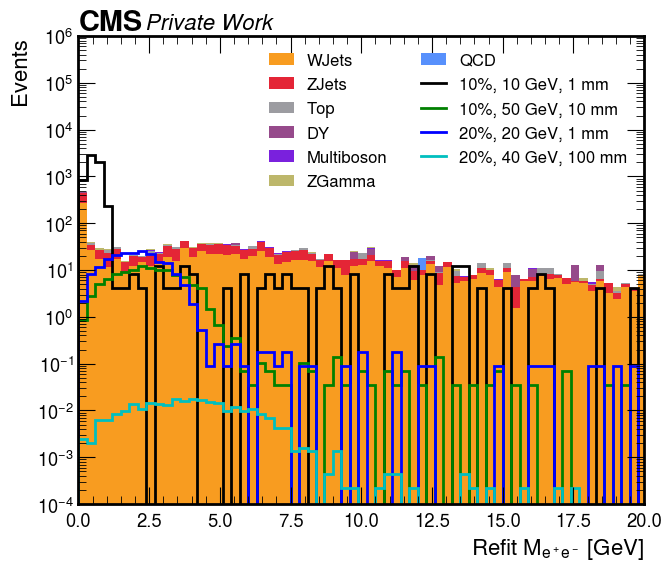

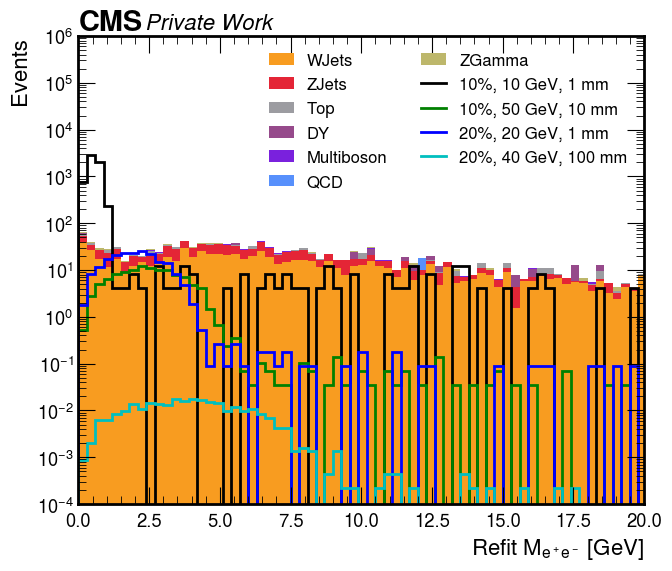

In [8]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"sel_vtx_corrMass"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"Refit $M_{e^+e^-}$ [GeV]"
    title = None
    hname = "sel_vtx_corrMass"
    xlim = [0,20]
    ylim = [1e-4,1e6]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


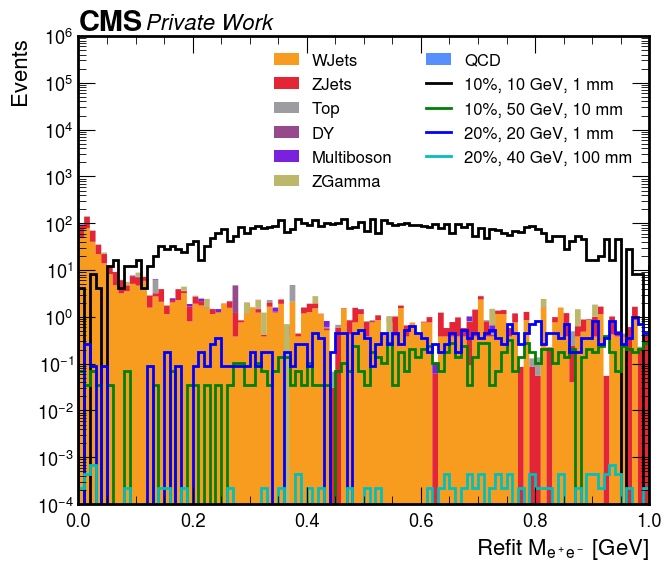

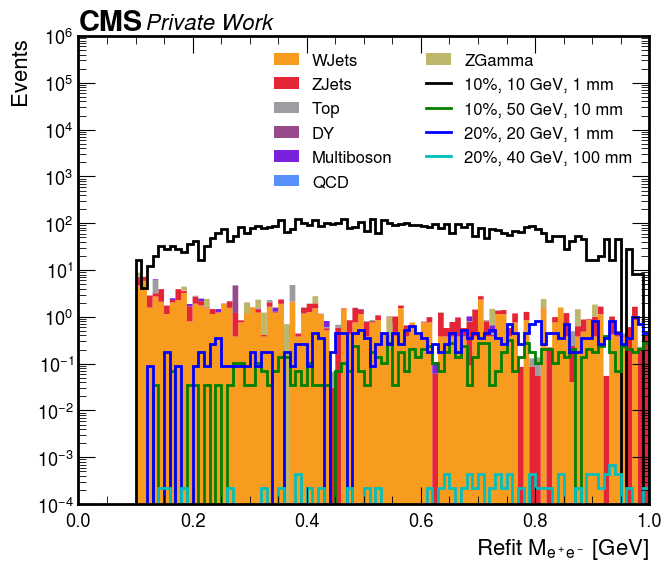

In [9]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"sel_vtx_corrMass_low"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"Refit $M_{e^+e^-}$ [GeV]"
    title = None
    hname = "sel_vtx_corrMass_low"
    xlim = [0,1]
    ylim = [1e-4,1e6]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


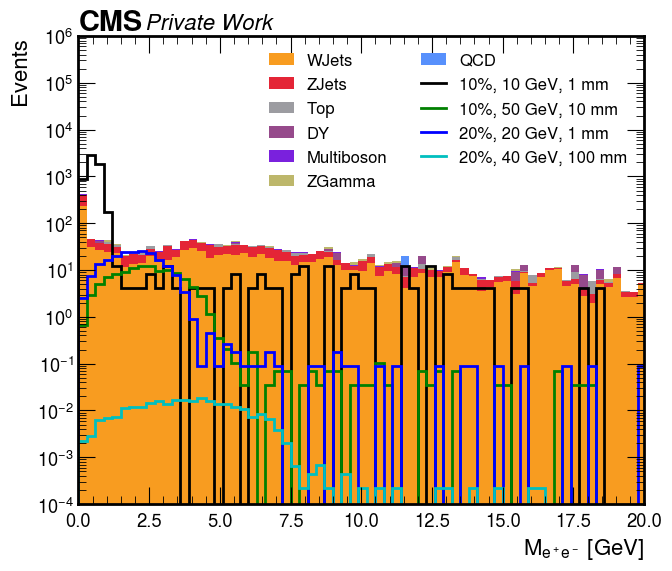

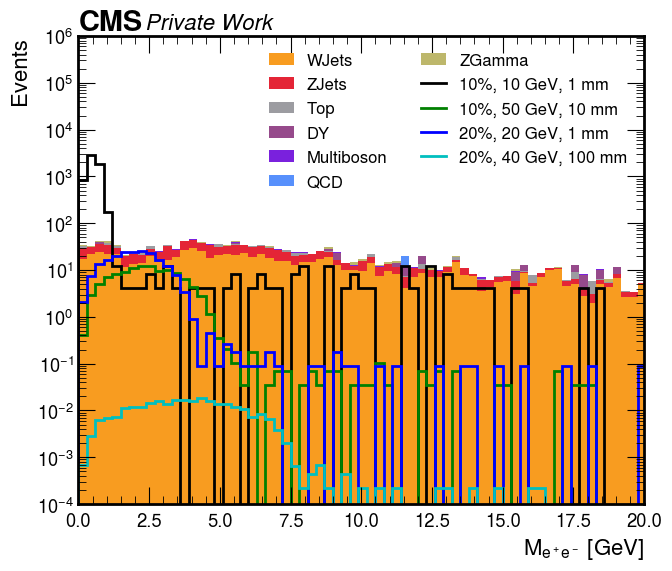

In [10]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"sel_vtx_mass"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$M_{e^+e^-}$ [GeV]"
    title = None
    hname = "sel_vtx_mass"
    xlim = [0,20]
    ylim = [1e-4,1e6]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


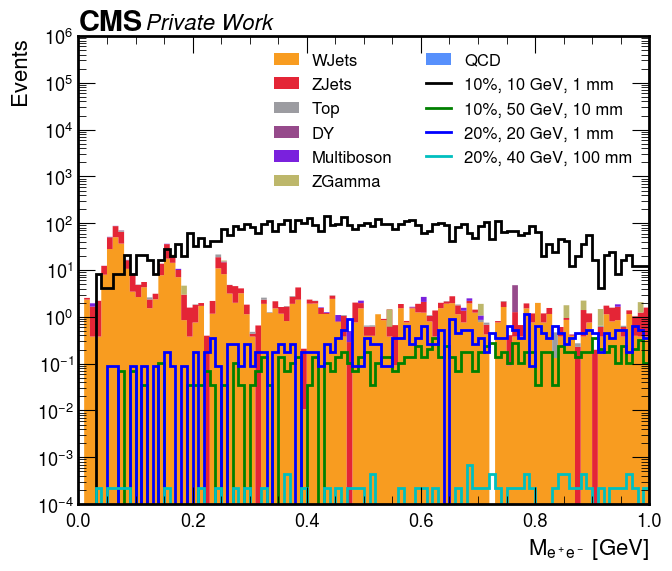

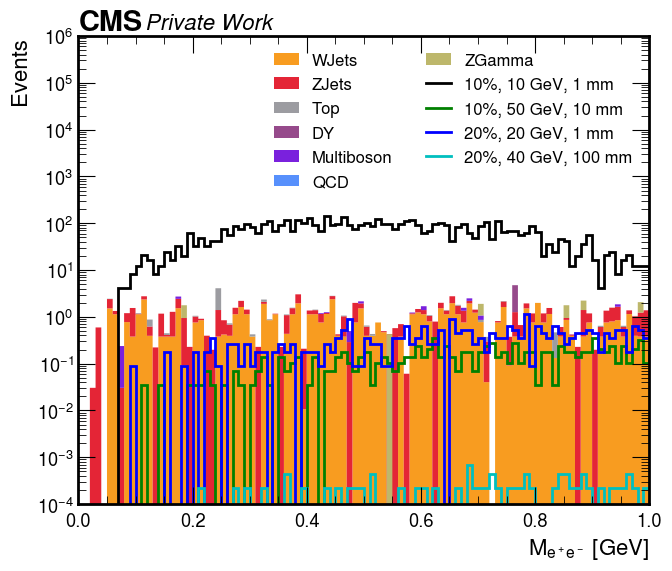

In [11]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"sel_vtx_mass_low"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$M_{e^+e^-}$ [GeV]"
    title = None
    hname = "sel_vtx_mass_low"
    xlim = [0,1]
    ylim = [1e-4,1e6]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


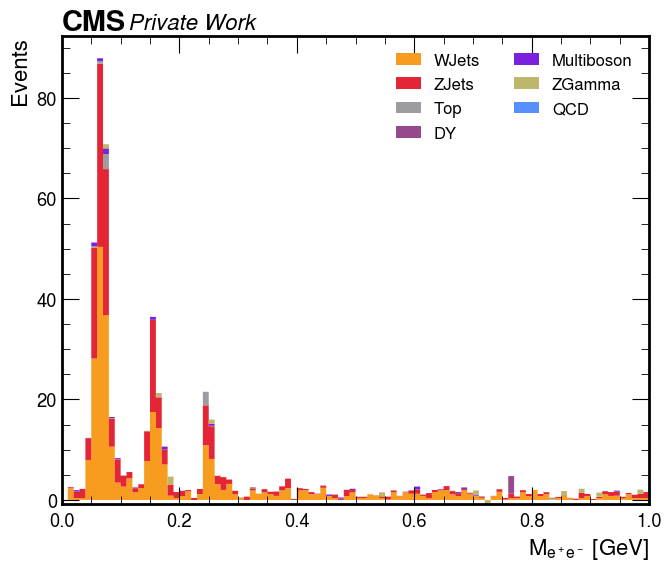

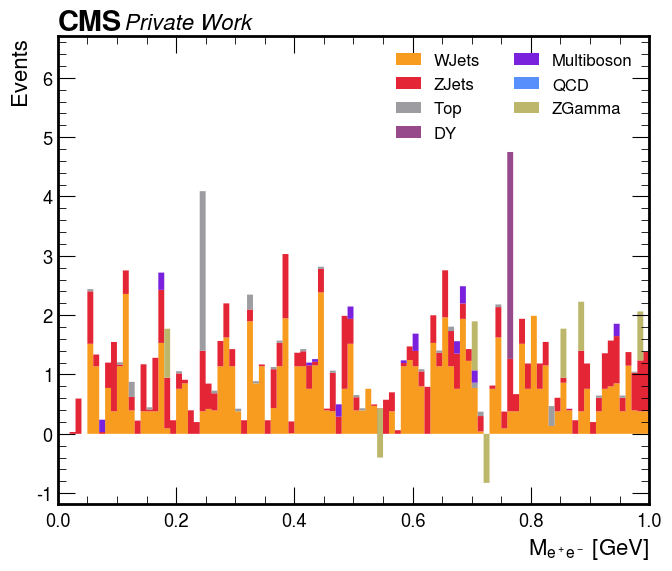

In [12]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"sel_vtx_mass_low"+f"_bkgOnly_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$M_{e^+e^-}$ [GeV]"
    title = None
    hname = "sel_vtx_mass_low"
    xlim = [0,1]
    ylim = None
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=True,show=True,logy=False,density=False,title=title,histtype='step',yerr=False,bkgOnly=True)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


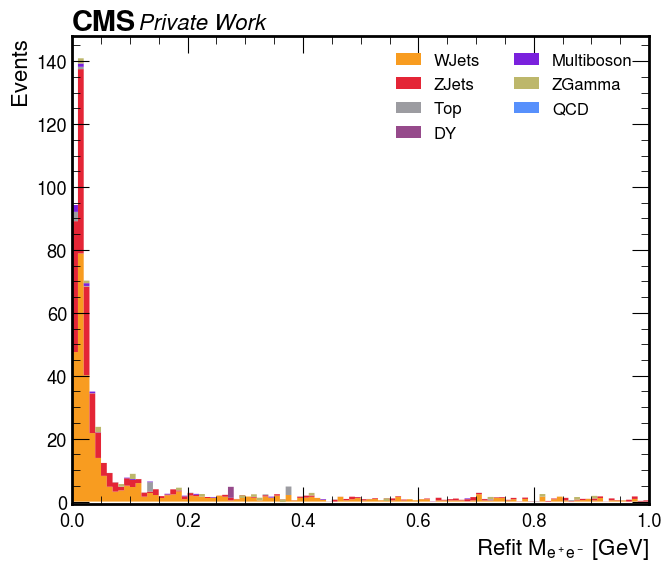

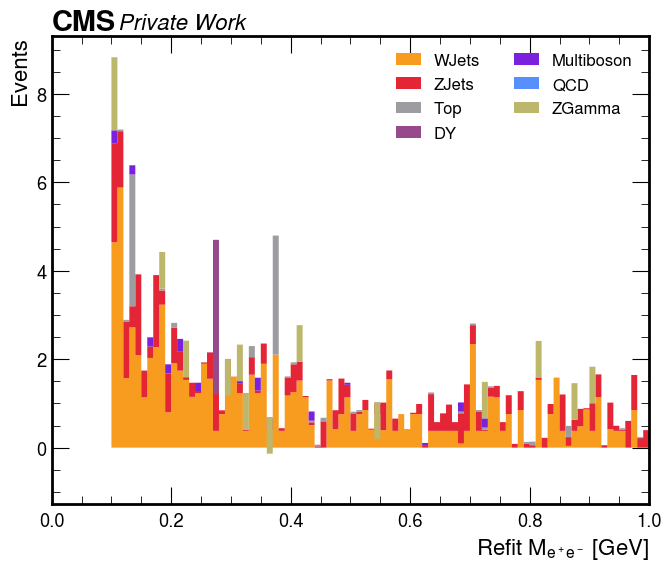

In [13]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"sel_vtx_corrMass_low"+f"_bkgOnly_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"Refit $M_{e^+e^-}$ [GeV]"
    title = None
    hname = "sel_vtx_corrMass_low"
    xlim = [0,1]
    ylim = None
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=True,show=True,logy=False,density=False,title=title,histtype='step',yerr=False,bkgOnly=True)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


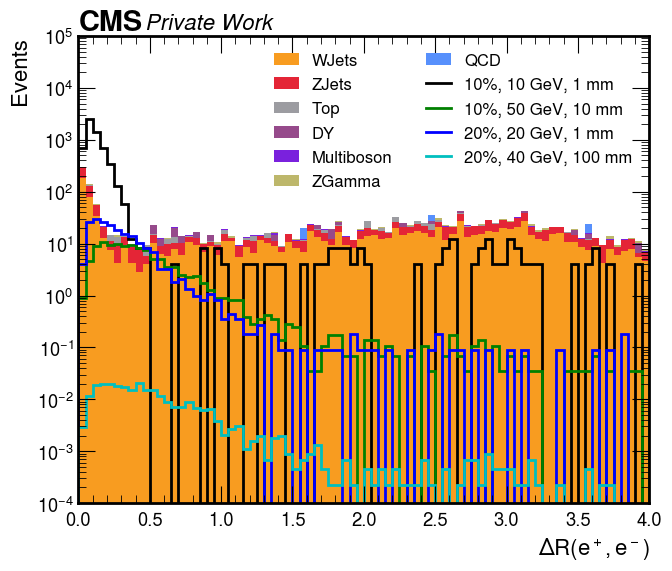

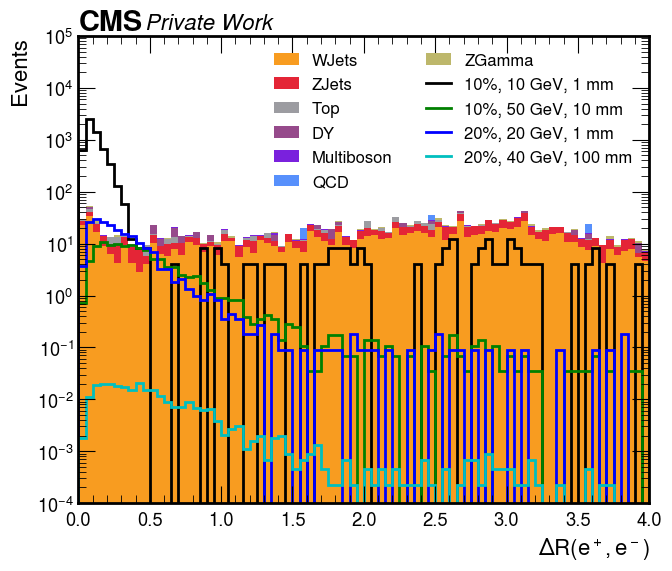

In [14]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"sel_vtx_dR"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$\Delta R(e^+,e^-)$"
    title = None
    hname = "sel_vtx_dR"
    xlim = [0,4]
    ylim = [1e-4,1e5]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


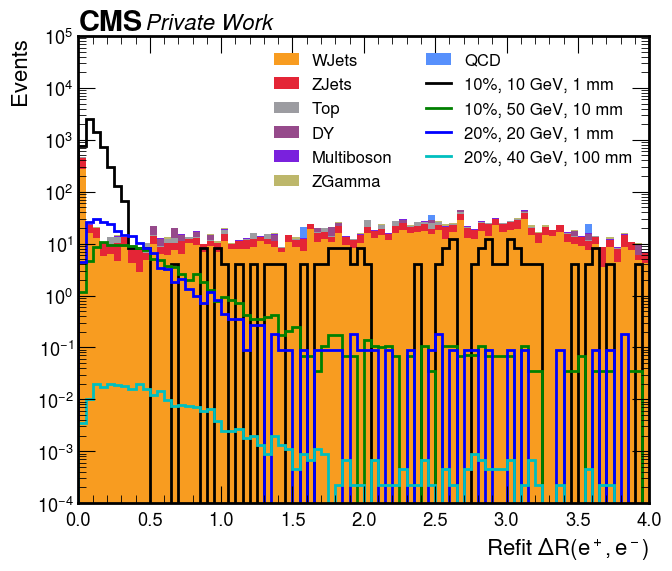

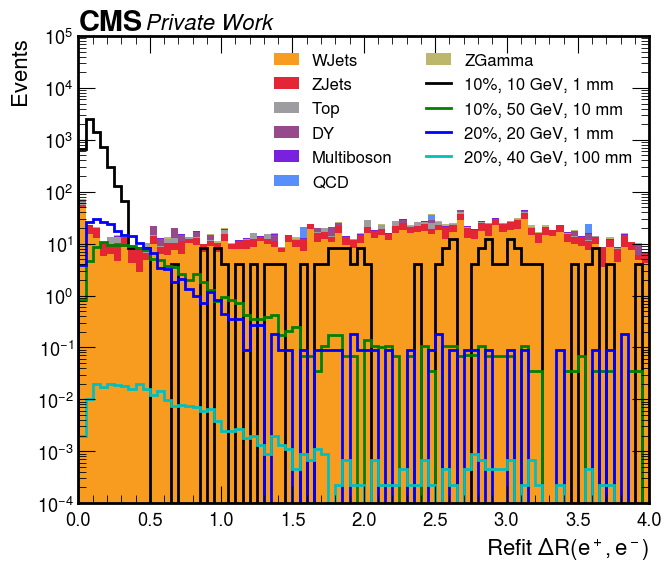

In [15]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"sel_vtx_corrdR"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"Refit $\Delta R(e^+,e^-)$"
    title = None
    hname = "sel_vtx_corrdR"
    xlim = [0,4]
    ylim = [1e-4,1e5]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False,legend_loc='upper right')

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


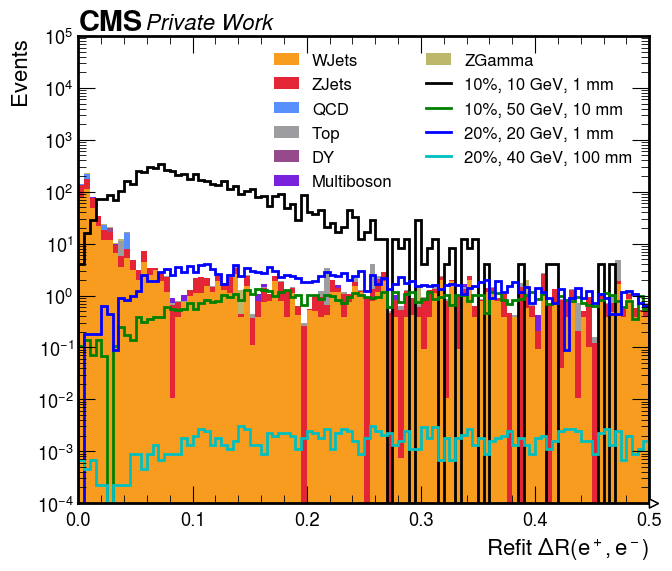

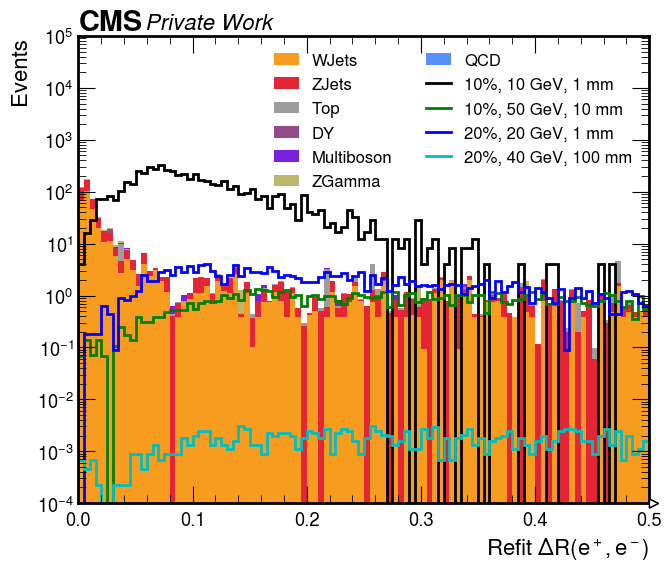

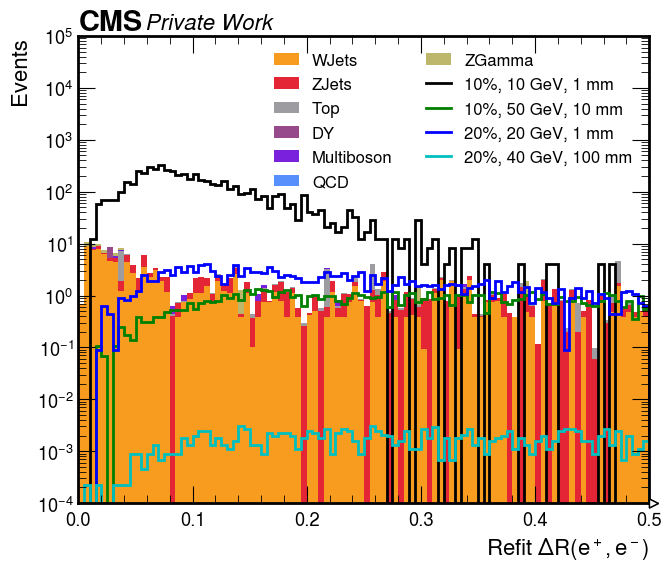

In [28]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"sel_vtx_corrdR_low"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"Refit $\Delta R(e^+,e^-)$"
    title = None
    hname = "sel_vtx_corrdR_lo"
    xlim = [0,0.5]
    ylim = [1e-4,1e5]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False,legend_loc='upper right')

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


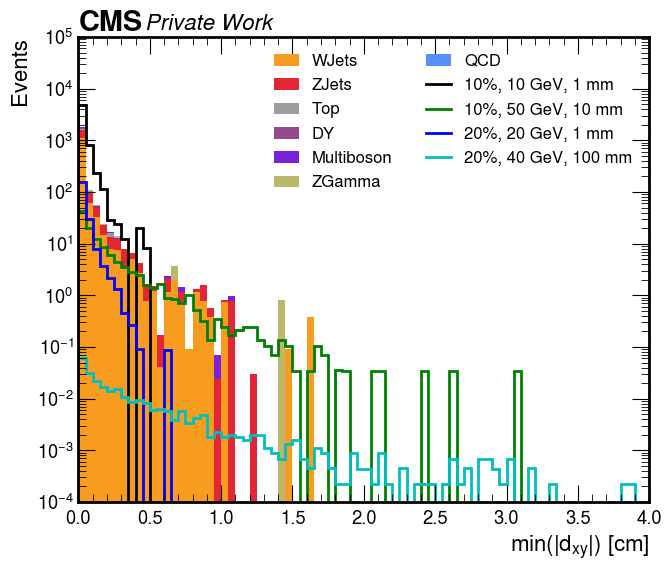

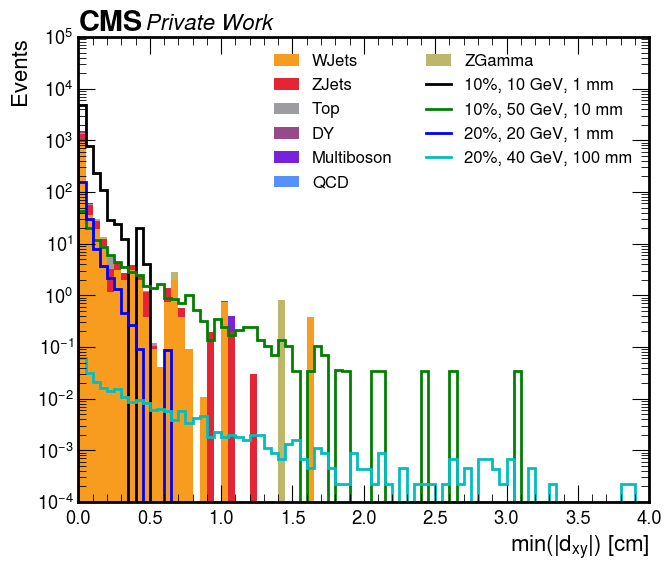

In [16]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"sel_vtx_mindxy"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$\min(|d_{xy}|)$ [cm]"
    title = None
    hname = "sel_vtx_mindxy"
    xlim = [0,4]
    ylim = [1e-4,1e5]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=5j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


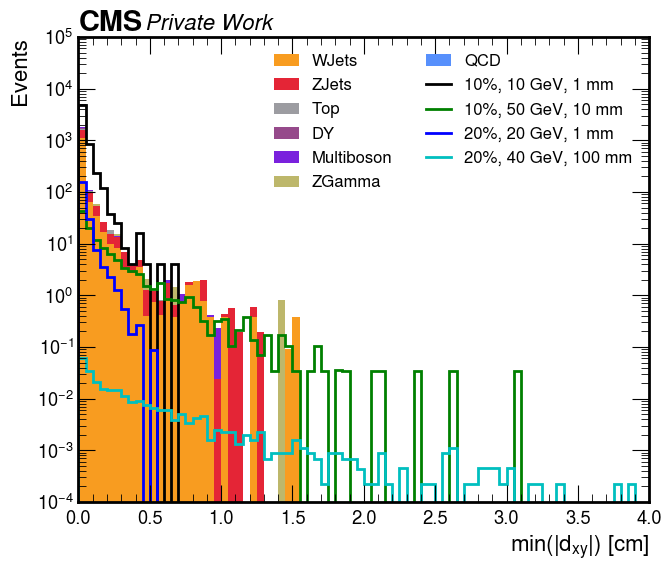

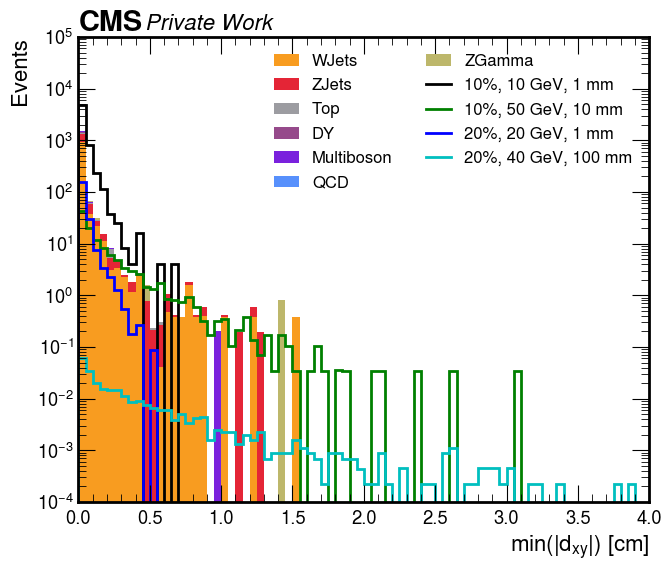

In [17]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"sel_vtx_corrMindxy"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$\min(|d_{xy}|)$ [cm]"
    title = None
    hname = "sel_vtx_corrMindxy"
    xlim = [0,4]
    ylim = [1e-4,1e5]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=5j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


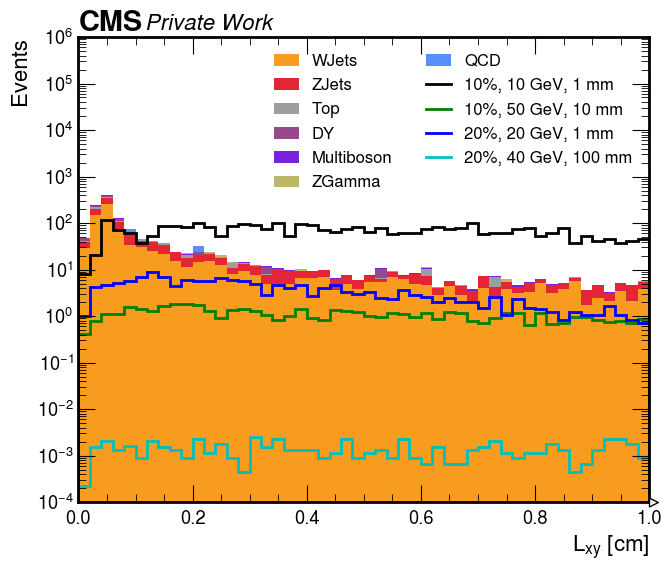

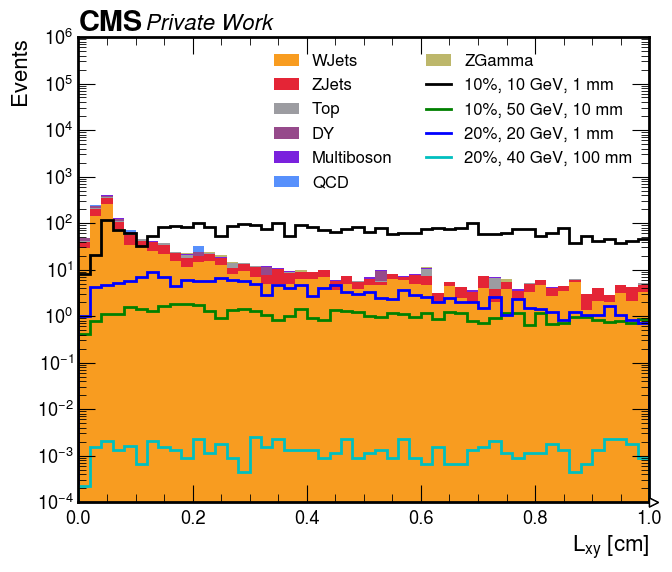

In [18]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"sel_vtx_vxy1"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$L_{xy}$ [cm]"
    title = None
    hname = "sel_vtx_vxy1"
    xlim = [0,1]
    ylim = [1e-4,1e6]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=2j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


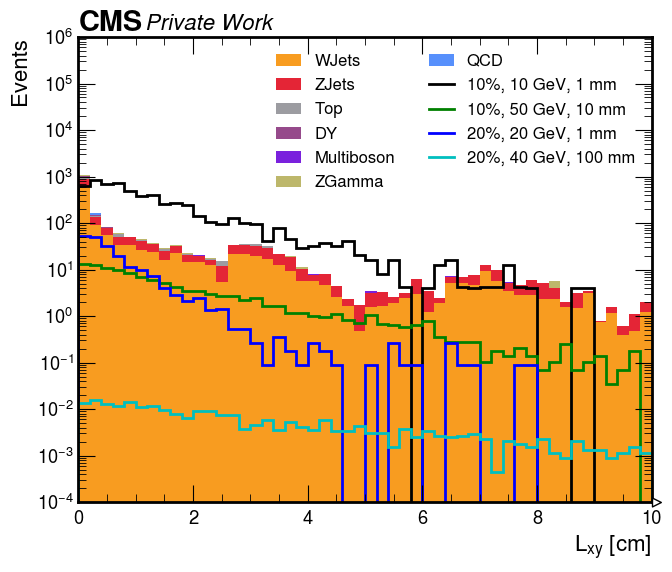

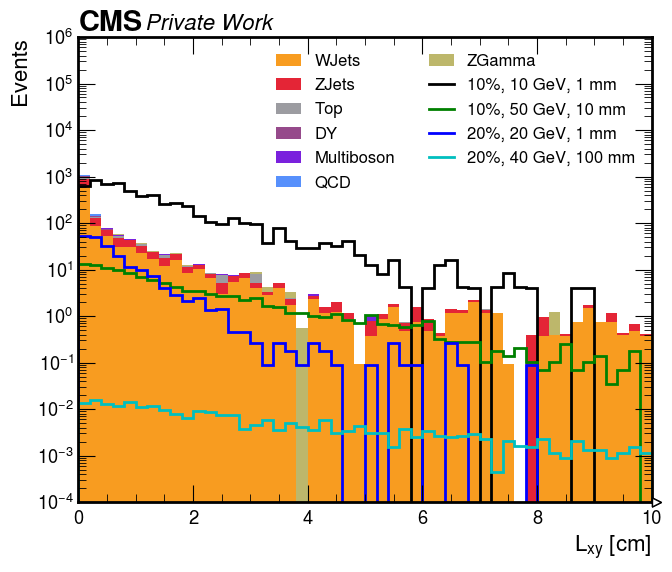

In [19]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"sel_vtx_vxy10"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$L_{xy}$ [cm]"
    title = None
    hname = "sel_vtx_vxy10"
    xlim = [0,10]
    ylim = [1e-4,1e6]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=2j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


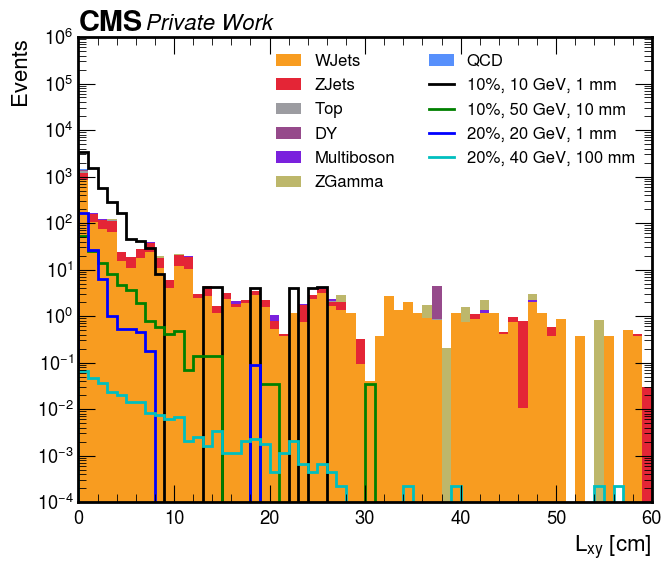

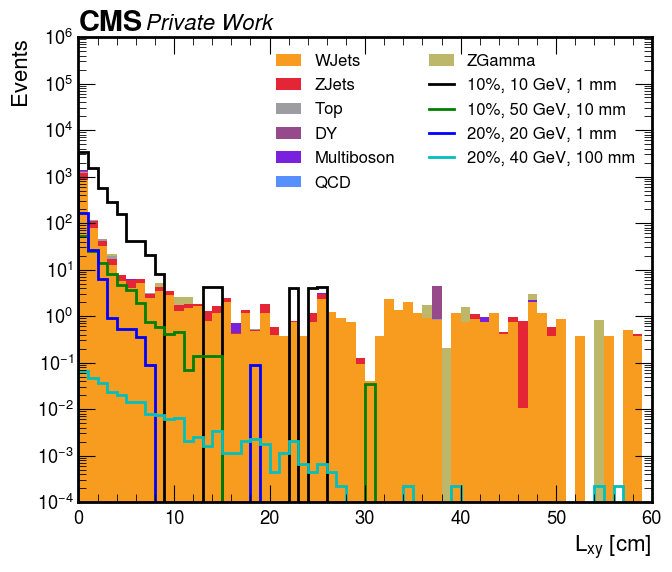

In [20]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"sel_vtx_vxy100"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$L_{xy}$ [cm]"
    title = None
    hname = "sel_vtx_vxy100"
    xlim = [0,60]
    ylim = [1e-4,1e6]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


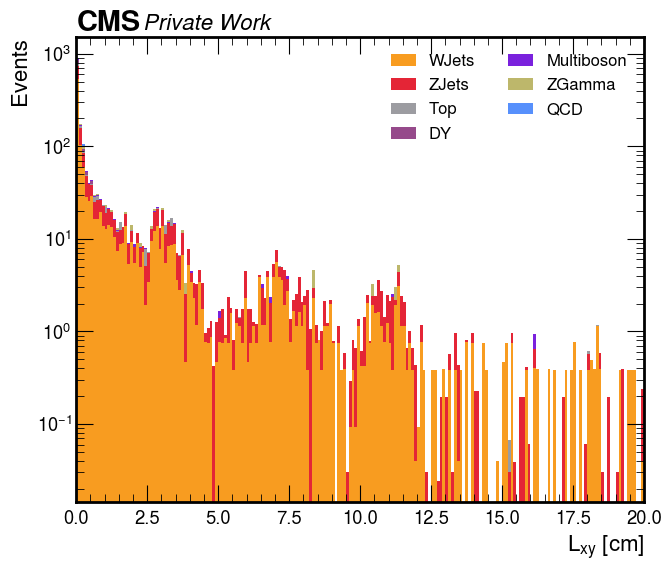

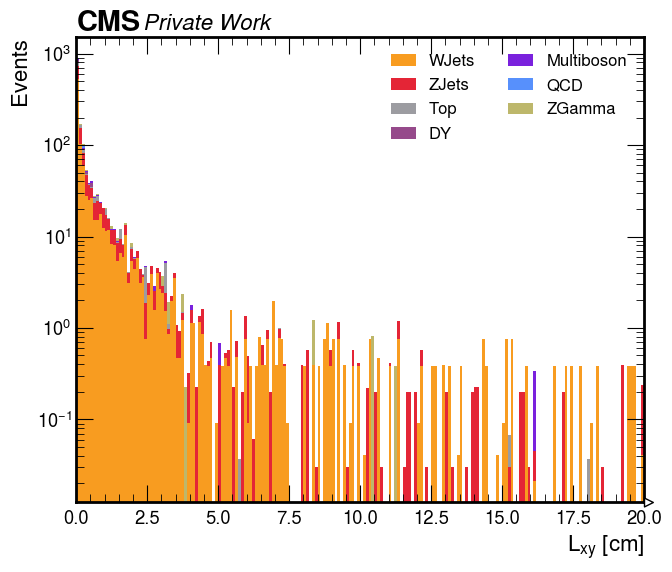

In [84]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"sel_vtx_vxy20"+f"_bkgOnly_{CUT}"
    selection = {"cut":CUT,"mass_low":sum}
    xlabel = r"$L_{xy}$ [cm]"
    title = None
    hname = "sel_vtx_mass_vs_vxy20"
    xlim = [0,20]
    #ylim = [1e-4,1e6]
    ylim = None
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False,bkgOnly=True)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


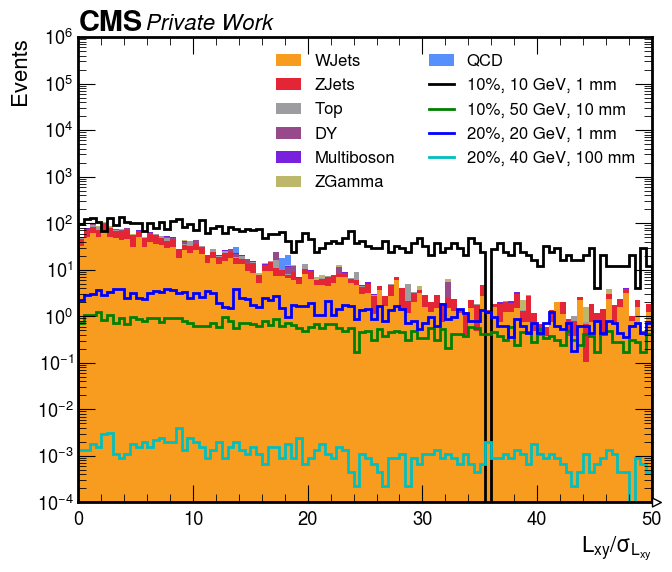

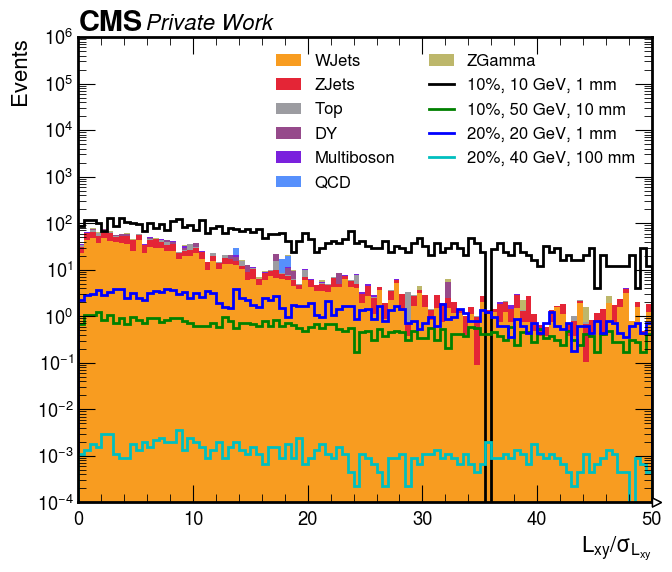

In [21]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"sel_vtx_vxySignif"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$L_{xy}/\sigma_{L_{xy}}$"
    title = None
    hname = "sel_vtx_vxySignif"
    xlim = [0,50]
    ylim = [1e-4,1e6]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=5j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


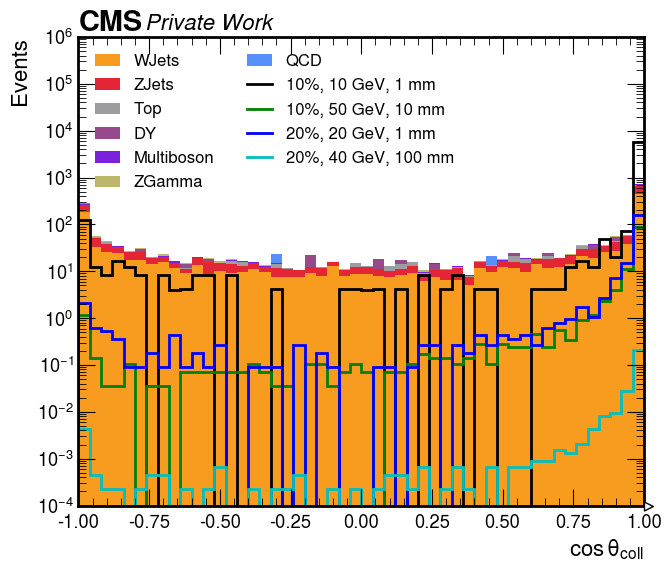

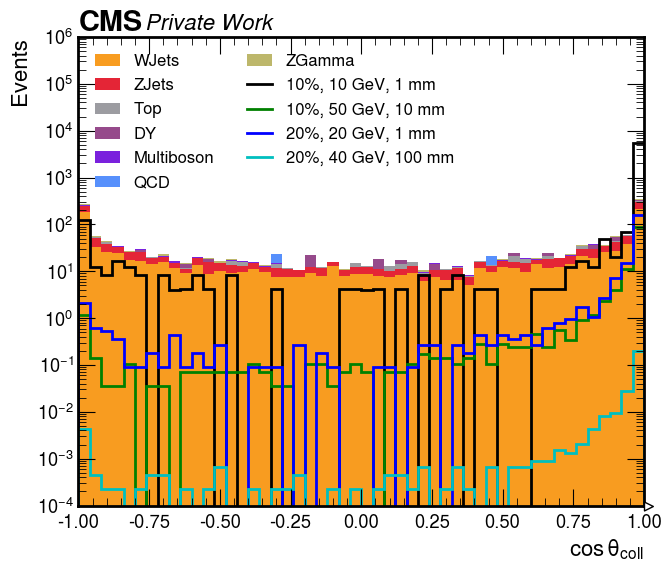

In [22]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"sel_vtx_cosThetaColl"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$\cos\theta_\mathrm{coll}$"
    title = None
    hname = "sel_vtx_CosThetaColl"
    xlim = [-1,1]
    ylim = [1e-4,1e6]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=2j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


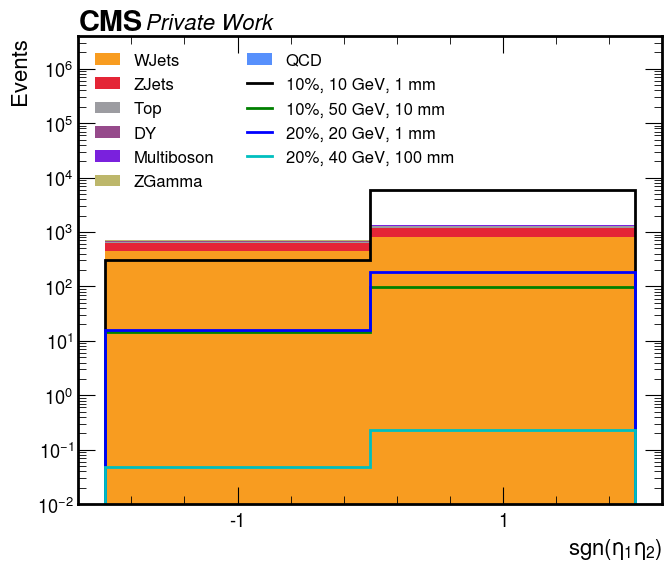

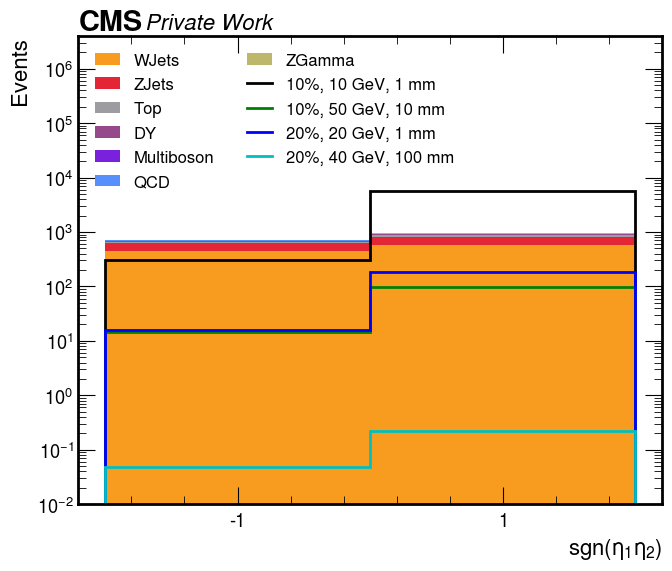

In [23]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"sel_vtx_signEtaProd"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$\mathrm{sgn}(\eta_1\eta_2)$"
    title = None
    hname = "sel_vtx_sign_etaProd"
    xlim = None
    ylim = [1e-2,4e6]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


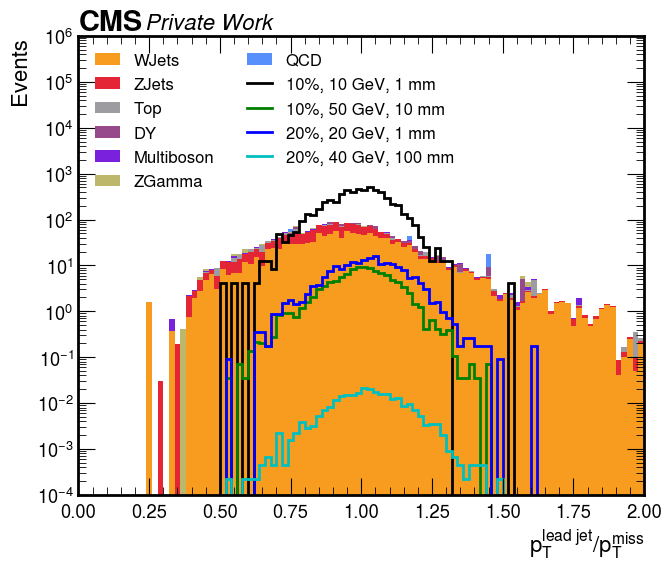

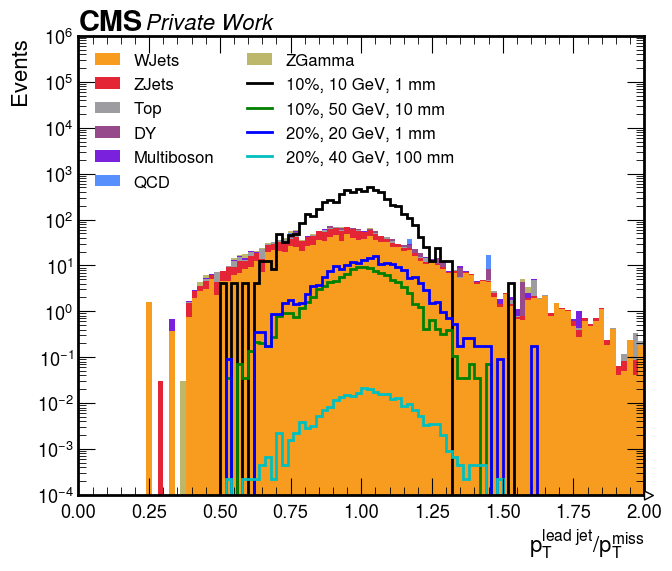

In [24]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"jetMETRatio"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$p_T^\text{lead jet}/p_T^\text{miss}$"
    title = None
    hname = "jetMETratio"
    xlim = [0,2]
    ylim = [1e-4,1e6]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False,legend_loc='upper left')

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


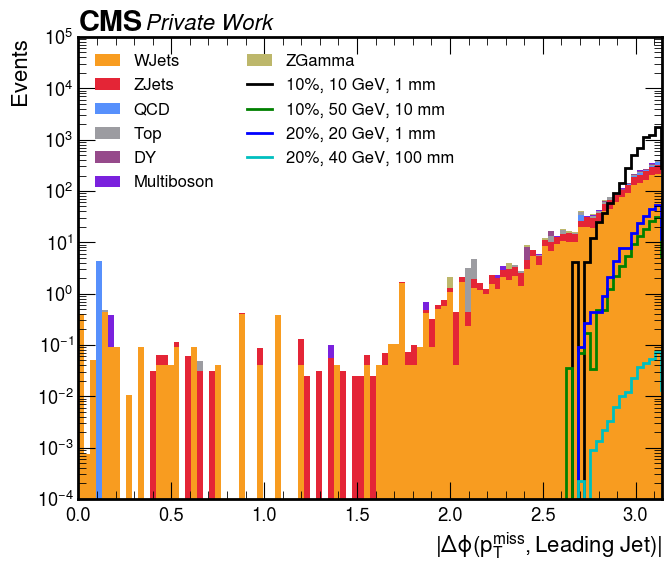

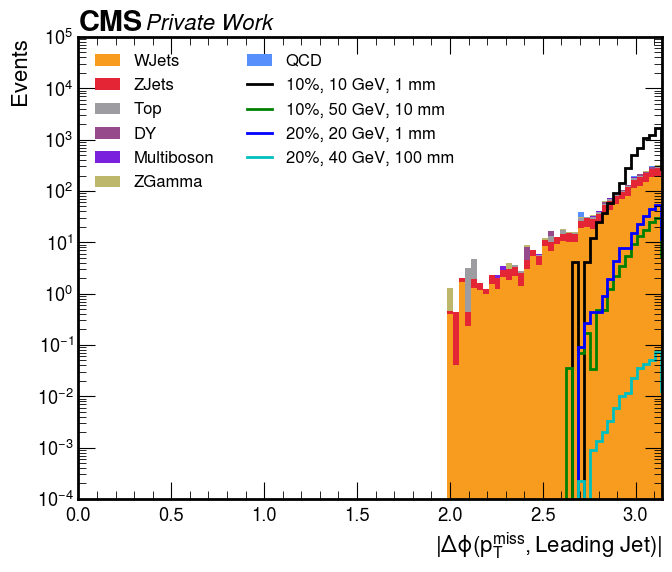

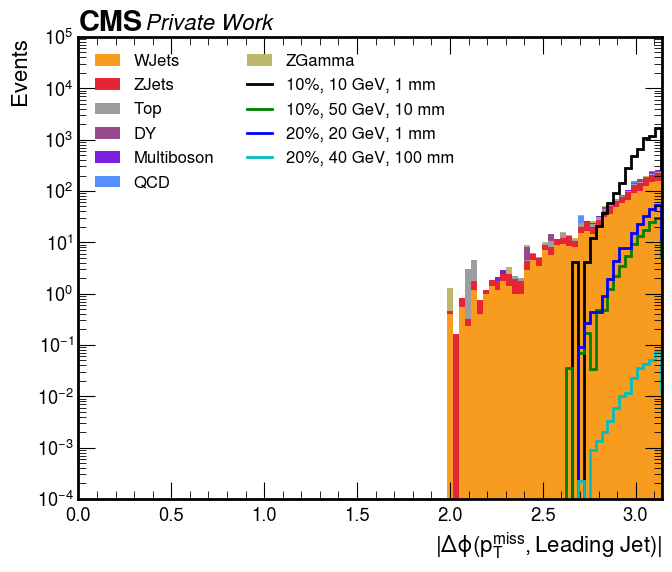

In [25]:
cuts = ['cut3','cut5','cut6']
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/CDFs/{CUT}/"
    outName = f"cdf_jetMETRatio"+f"_allSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$p_T^\text{lead jet}/p_T^\text{miss}$"
    title = None
    hname = "jetMETratio"
    xlim = [0,2]
    ylim = [1e-4,1e6]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


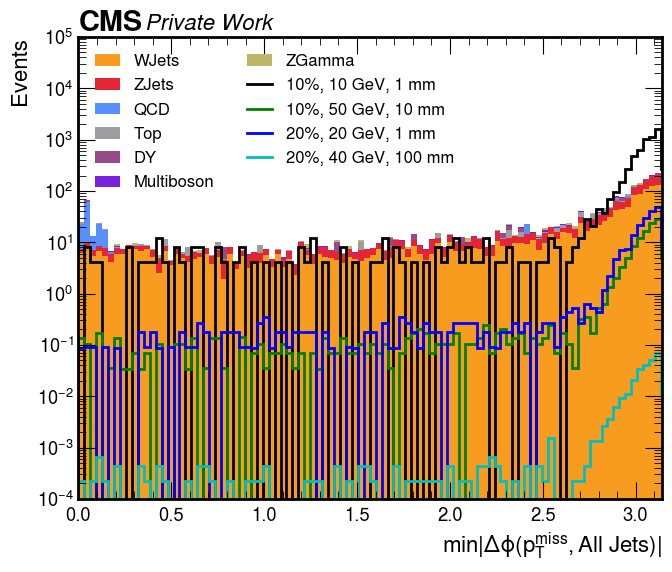

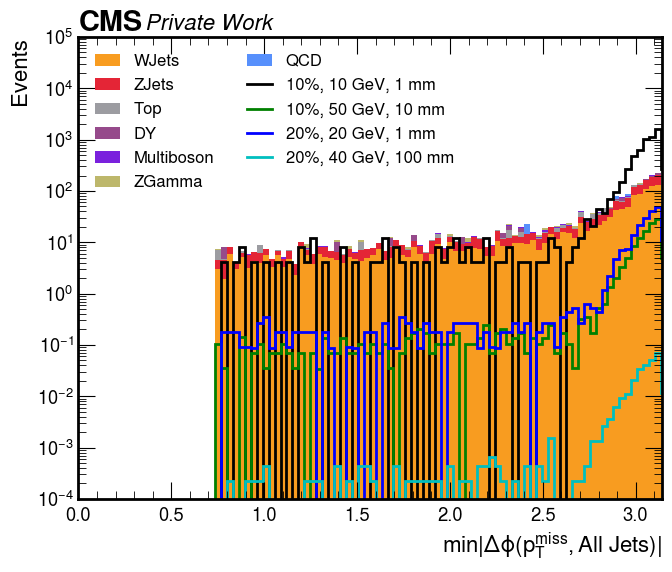

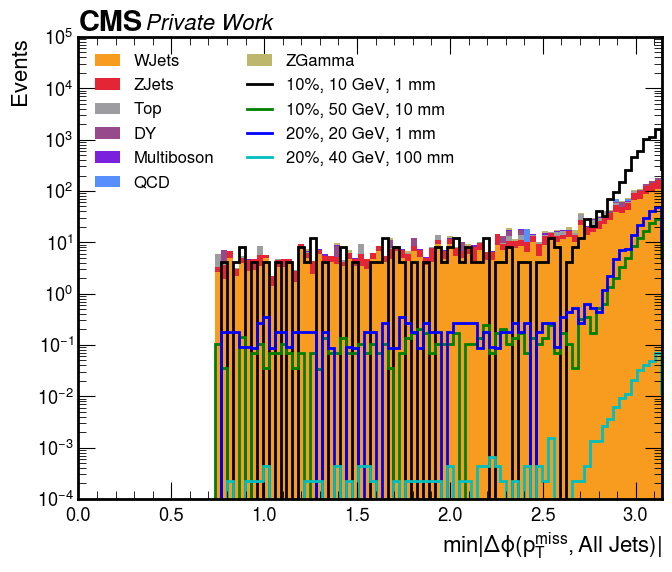

In [26]:
cuts = ['cut3','cut5','cut6']
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"minJetMETdPhi"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$\min|\Delta \phi(p_T^\text{miss},\text{All Jets})|$"
    title = None
    hname = "minJetMETdPhi"
    xlim = [0,np.pi]
    ylim = [1e-4,1e5]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


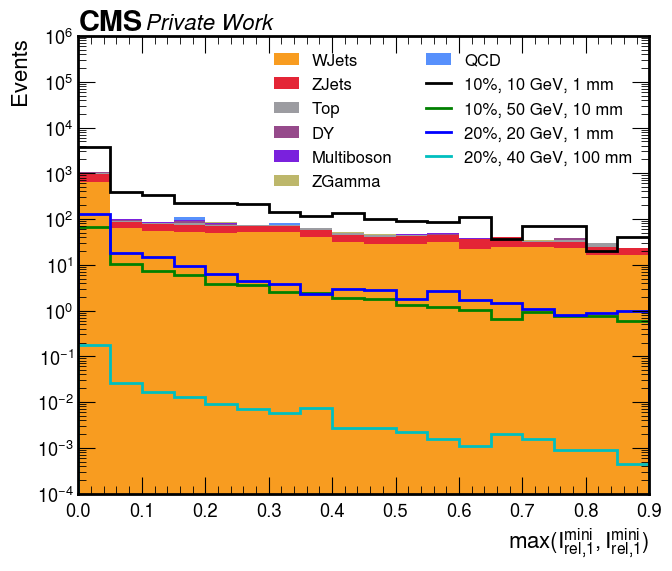

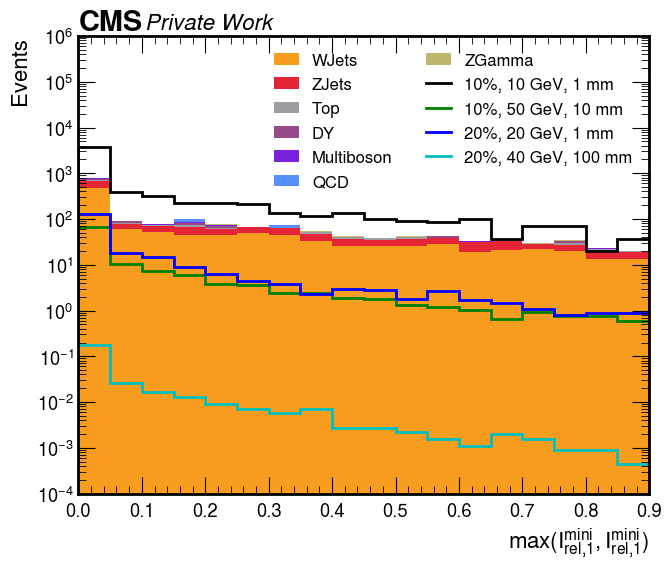

In [52]:
cuts = ['cut5','cut6']
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"sel_vtx_maxMiniIso"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$\max(I_\text{rel,1}^\text{mini},I_\text{rel,1}^\text{mini})$"
    title = None
    hname = "sel_vtx_maxMiniRelIsoCorr"
    xlim = [0,0.9]
    ylim = [1e-4,1e6]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


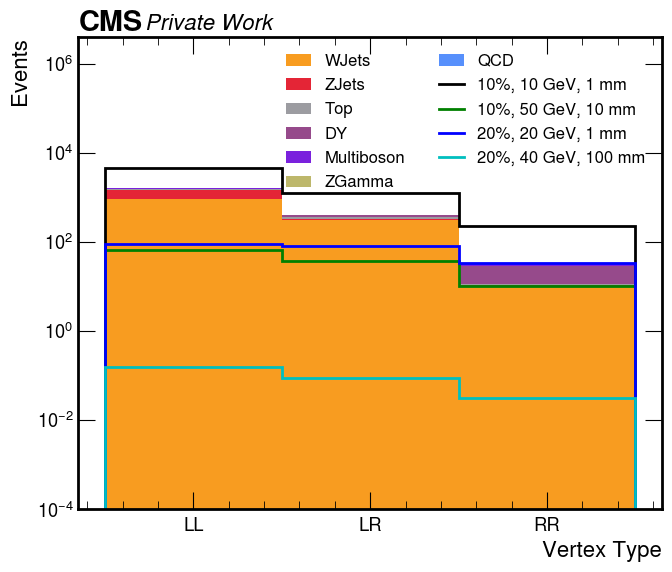

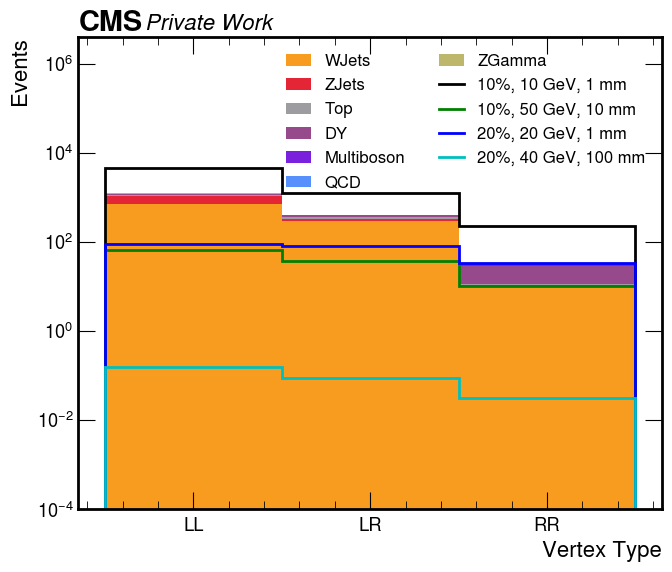

In [53]:
cuts = ['cut5','cut6']
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"sel_vtx_type"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"Vertex Type"
    title = None
    hname = "sel_vtx_type"
    xlim = None
    ylim = [1e-4,4e6]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=True,show=True,logy=True,density=False,title=title,histtype='step',yerr=False,legend_loc='upper right')

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


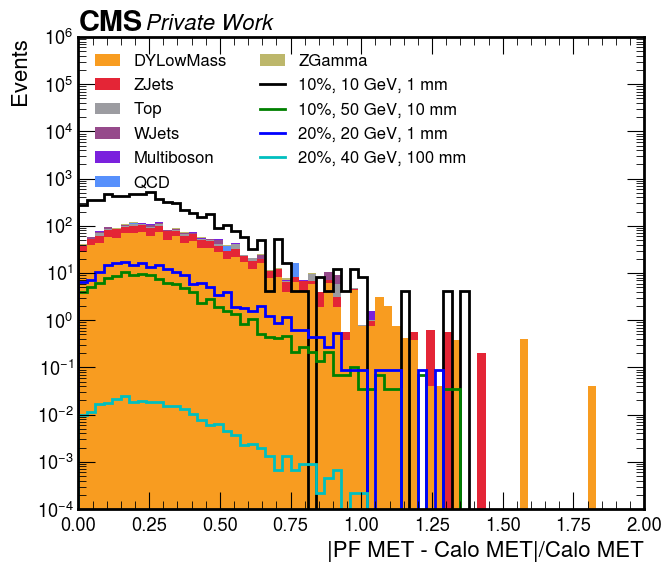

In [19]:
cuts = ['cut6']
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/bdtInputs/{CUT}/"
    outName = f"pfCaloMetRatio"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"|PF MET - Calo MET|/Calo MET"
    title = None
    hname = "pfCalo_metRatio"
    xlim = [0,2]
    ylim = [1e-4,1e6]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=False,show=True,logy=True,density=False,title=title,histtype='step',yerr=False,legend_loc='upper left')

# Conversions Study - pre mass cut

In [56]:
hcs = ptools.histContainer("skimmed_signal_histos_cuts_vtx_v8.coffea")
hcb = ptools.histContainer("skimmed_bkg_histos_cuts_vtx_v8.coffea",bkg=True)
dfs = utils.get_dict_fromCutflow(hcs.load('cutflow'))
dfs['legend'] = dfs.apply(ptools.make_label,axis=1)
selected_signals = ["sig_2018_Mchi-10p5_dMchi-1p0_ctau-1",
                    "sig_2018_Mchi-52p5_dMchi-5p0_ctau-10",
                    "sig_2018_Mchi-22p0_dMchi-4p0_ctau-1",
                    "sig_2018_Mchi-44p0_dMchi-8p0_ctau-100"]
selected_labels = [dfs[dfs.name==s].legend.item() for s in selected_signals]

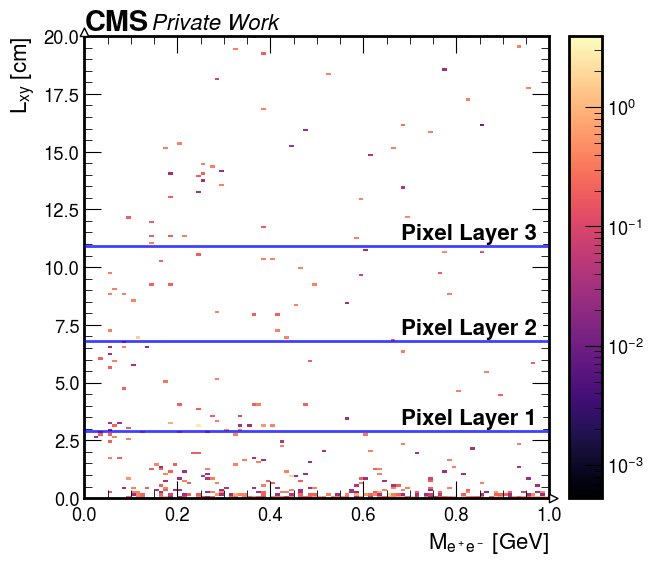

In [73]:
plt.figure(figsize=(6,6))
cut = "cut6"
h = hcb.load("sel_vtx_mass_vs_vxy20")[{"samp":sum,"cut":cut}][::1j,::1j]
hep.hist2dplot(h,norm=LogNorm(),cmap="magma",zorder=1)
plt.xlim([0,1])
hep.cms.text("Private Work")
plt.xlabel(r"$M_{e^+e^-}$ [GeV]")
plt.ylabel(r"$L_{xy}$ [cm]")
plt.axhline(2.9,linestyle='-',lw=2,color='b',alpha=0.75,zorder=3)
plt.text(0.68,3.2,"Pixel Layer 1",fontweight='bold',backgroundcolor='white',zorder=2)
plt.axhline(6.8,linestyle='-',lw=2,color='b',alpha=0.75,zorder=3)
plt.text(0.68,7.1,"Pixel Layer 2",fontweight='bold',backgroundcolor='white',zorder=2)
plt.axhline(10.9,linestyle='-',lw=2,color='b',alpha=0.75,zorder=3)
plt.text(0.68,11.2,"Pixel Layer 3",fontweight='bold',backgroundcolor='white',zorder=2)
#plt.tight_layout()
plt.savefig(f"plots_vtx_v8/bkg_conversions/annotated_vxy_vs_mass_bkg_{cut}.pdf")

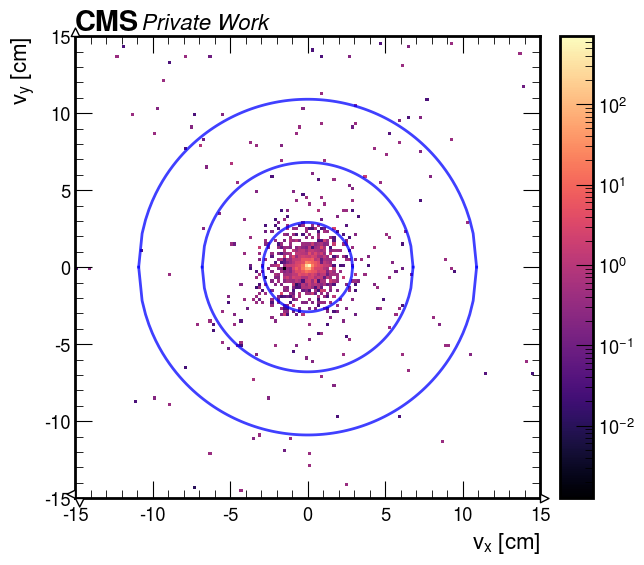

In [75]:
plt.figure(figsize=(6,6))
cut = "cut6"
h = hcb.load("sel_vtx_vx_vs_vy")[{"samp":sum,"cut":cut}][::2j,::2j]
hep.hist2dplot(h,norm=LogNorm(),cmap='magma')

x3 = np.linspace(-2.9,2.9,100)
plt.plot(x3,np.sqrt(2.9**2 - x3**2),color='b',lw=2,alpha=0.75,linestyle='-')
plt.plot(x3,-np.sqrt(2.9**2 - x3**2),color='b',lw=2,alpha=0.75,linestyle='-')

x7 = np.linspace(-6.8,6.8,100)
plt.plot(x7,np.sqrt(6.8**2 - x7**2),color='b',lw=2,alpha=0.75,linestyle='-')
plt.plot(x7,-np.sqrt(6.8**2 - x7**2),color='b',lw=2,alpha=0.75,linestyle='-')

x7 = np.linspace(-10.9,10.9,100)
plt.plot(x7,np.sqrt(10.9**2 - x7**2),color='b',lw=2,alpha=0.75,linestyle='-')
plt.plot(x7,-np.sqrt(10.9**2 - x7**2),color='b',lw=2,alpha=0.75,linestyle='-')

hep.cms.text("Private Work")
plt.xlabel(r"$v_{x}$ [cm]")
plt.ylabel(r"$v_{y}$ [cm]")
#plt.tight_layout()
plt.savefig(f"plots_vtx_v8/bkg_conversions/vx_vs_vy_bkg_{cut}.pdf")

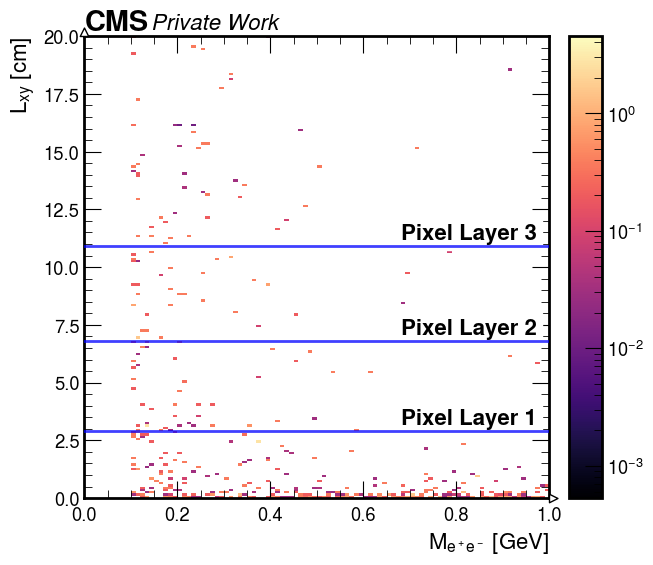

In [77]:
plt.figure(figsize=(6,6))
cut = "cut6"
h = hcb.load("sel_vtx_corrMass_vs_vxy20")[{"samp":sum,"cut":cut}][::1j,::1j]
hep.hist2dplot(h,norm=LogNorm(),cmap="magma",zorder=1)
plt.xlim([0,1])
hep.cms.text("Private Work")
plt.xlabel(r"$M_{e^+e^-}$ [GeV]")
plt.ylabel(r"$L_{xy}$ [cm]")
plt.axhline(2.9,linestyle='-',lw=2,color='b',alpha=0.75,zorder=3)
plt.text(0.68,3.2,"Pixel Layer 1",fontweight='bold',backgroundcolor='white',zorder=2)
plt.axhline(6.8,linestyle='-',lw=2,color='b',alpha=0.75,zorder=3)
plt.text(0.68,7.1,"Pixel Layer 2",fontweight='bold',backgroundcolor='white',zorder=2)
plt.axhline(10.9,linestyle='-',lw=2,color='b',alpha=0.75,zorder=3)
plt.text(0.68,11.2,"Pixel Layer 3",fontweight='bold',backgroundcolor='white',zorder=2)
#plt.tight_layout()
plt.savefig(f"plots_vtx_v8/bkg_conversions/annotated_vxy_vs_corrMass_bkg_{cut}.pdf")

# conversions? post m > 0.1 cut

In [64]:
hcs = ptools.histContainer("skimmed_signal_histos_cuts_vtx_v8_cut6only.coffea")
hcb = ptools.histContainer("skimmed_bkg_histos_cuts_vtx_v8_cut6only.coffea",bkg=True)
dfs = utils.get_dict_fromCutflow(hcs.load('cutflow'))
dfs['legend'] = dfs.apply(ptools.make_label,axis=1)
selected_signals = ["sig_2018_Mchi-10p5_dMchi-1p0_ctau-1",
                    "sig_2018_Mchi-52p5_dMchi-5p0_ctau-10",
                    "sig_2018_Mchi-22p0_dMchi-4p0_ctau-1",
                    "sig_2018_Mchi-44p0_dMchi-8p0_ctau-100"]
selected_labels = [dfs[dfs.name==s].legend.item() for s in selected_signals]

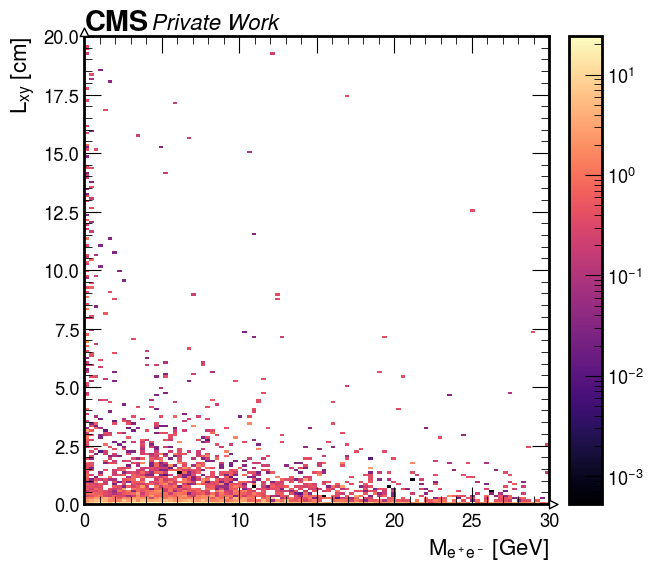

In [69]:
plt.figure(figsize=(6,6))
cut = "cut6"
h = hcb.load("sel_vtx_corrMass_med_vs_vxy20")[{"samp":sum,"cut":cut}][::1j,::1j]
hep.hist2dplot(h,norm=LogNorm(),cmap="magma",zorder=1)
#plt.xlim([0,1])
hep.cms.text("Private Work")
plt.xlabel(r"$M_{e^+e^-}$ [GeV]")
plt.ylabel(r"$L_{xy}$ [cm]")
#plt.axhline(2.9,linestyle='-',lw=2,color='b',alpha=0.75,zorder=3)
#plt.text(0.68,3.2,"Pixel Layer 1",fontweight='bold',backgroundcolor='white',zorder=2)
#plt.axhline(6.8,linestyle='-',lw=2,color='b',alpha=0.75,zorder=3)
#plt.text(0.68,7.1,"Pixel Layer 2",fontweight='bold',backgroundcolor='white',zorder=2)
#plt.axhline(10.9,linestyle='-',lw=2,color='b',alpha=0.75,zorder=3)
#plt.text(0.68,11.2,"Pixel Layer 3",fontweight='bold',backgroundcolor='white',zorder=2)
plt.tight_layout()
plt.savefig(f"plots_vtx_v8/bkg_conversions/annotated_vxy_vs_corrMass_med_bkg_{cut}.pdf")

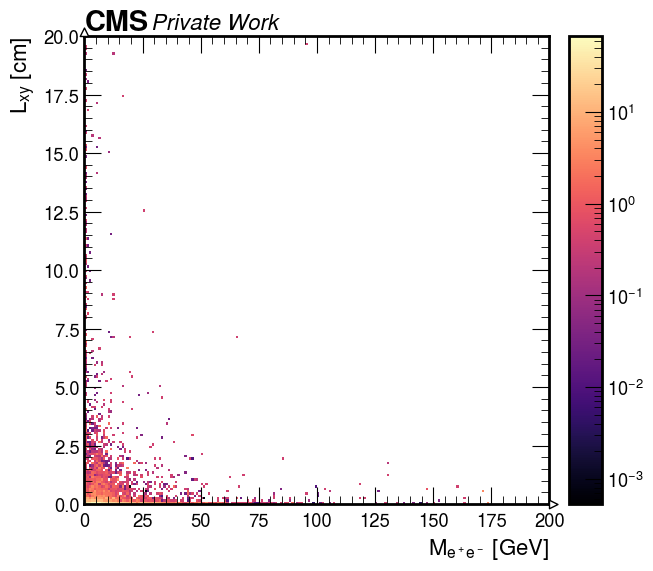

In [68]:
plt.figure(figsize=(6,6))
cut = "cut6"
h = hcb.load("sel_vtx_corrMass_high_vs_vxy20")[{"samp":sum,"cut":cut}][::1j,::1j]
hep.hist2dplot(h,norm=LogNorm(),cmap="magma",zorder=1)
#plt.xlim([0,1])
hep.cms.text("Private Work")
plt.xlabel(r"$M_{e^+e^-}$ [GeV]")
plt.ylabel(r"$L_{xy}$ [cm]")
#plt.axhline(2.9,linestyle='-',lw=2,color='b',alpha=0.75,zorder=3)
#plt.text(0.68,3.2,"Pixel Layer 1",fontweight='bold',backgroundcolor='white',zorder=2)
#plt.axhline(6.8,linestyle='-',lw=2,color='b',alpha=0.75,zorder=3)
#plt.text(0.68,7.1,"Pixel Layer 2",fontweight='bold',backgroundcolor='white',zorder=2)
#plt.axhline(10.9,linestyle='-',lw=2,color='b',alpha=0.75,zorder=3)
#plt.text(0.68,11.2,"Pixel Layer 3",fontweight='bold',backgroundcolor='white',zorder=2)
plt.tight_layout()
plt.savefig(f"plots_vtx_v8/bkg_conversions/annotated_vxy_vs_corrMass_high_bkg_{cut}.pdf")

# CDFs

In [29]:
cuts = ['cut5','cut6']

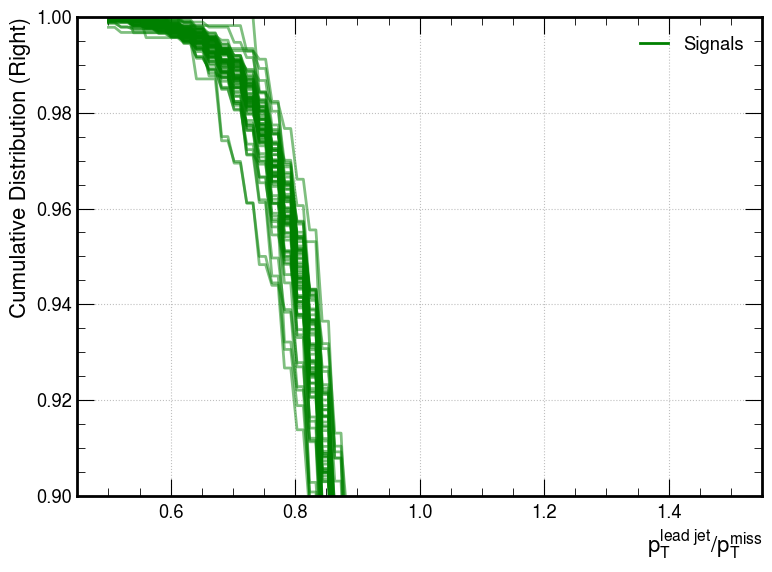

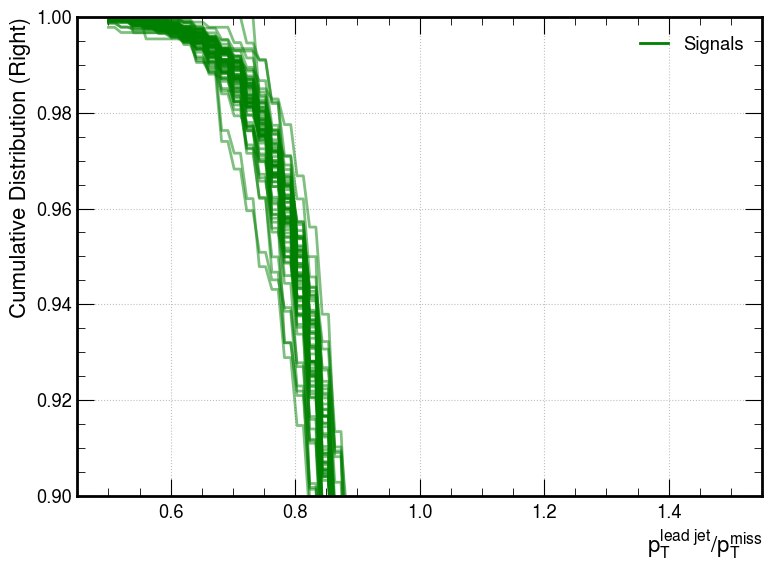

In [48]:
for i,CUT in enumerate(cuts):
    outD = f"plots_vtx_v8/cdfs/{CUT}/"
    outName = f"cdf_jetMETRatio"+f"_allSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$p_T^\text{lead jet}/p_T^\text{miss}$"
    title = None
    hname = "jetMETratio"
    xlim = [0.5,1.5]
    ylim = [0.9,1]
    logy = False
    right = True
    ptools.make_cdf_summary_sigVsBkg(dfs,hcs,hcb,hname,hname,selection,outName,outD,xlabel=xlabel,
                                     save=False,show=True,right=right,title=title,xlim=xlim,ylim=ylim,logy=logy,
                                     sigOnly=True)

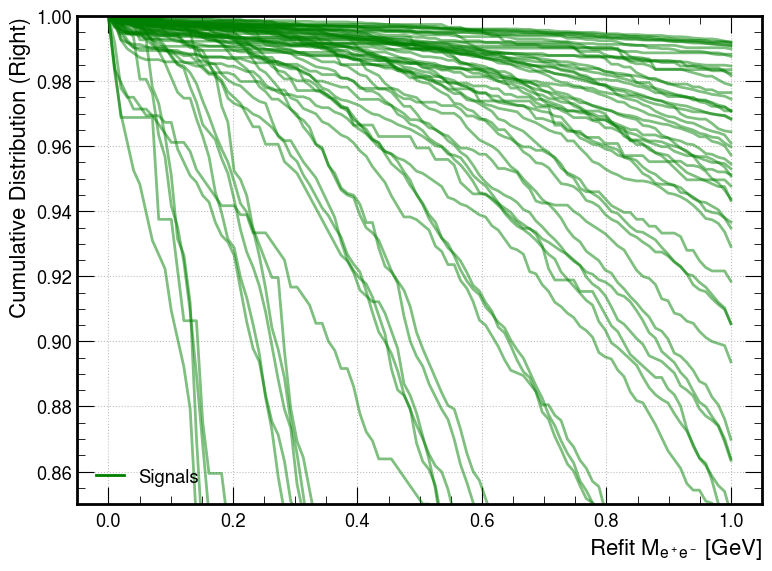

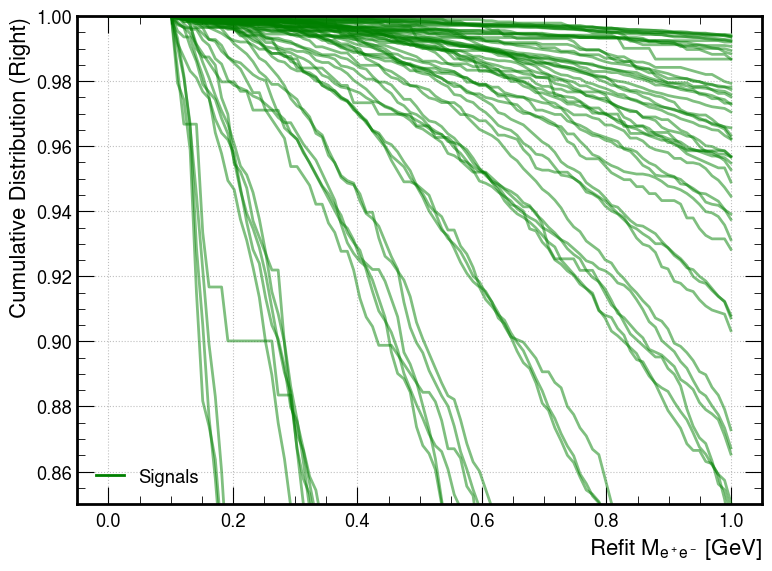

In [51]:
for i,CUT in enumerate(cuts):
    outD = f"plots_vtx_v8/cdfs/{CUT}/"
    outName = f"cdf_corrMass_low_allSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"Refit $M_{e^+e^-}$ [GeV]"
    title = None
    hname = "sel_vtx_corrMass_low"
    xlim = [0,1]
    ylim = [0.85,1]
    logy = False
    right = True
    ptools.make_cdf_summary_sigVsBkg(dfs,hcs,hcb,hname,hname,selection,outName,outD,xlabel=xlabel,
                                     save=False,show=True,right=right,title=title,xlim=xlim,ylim=ylim,logy=logy,
                                     sigOnly=True)

In [ ]:
cuts = ['cut6']

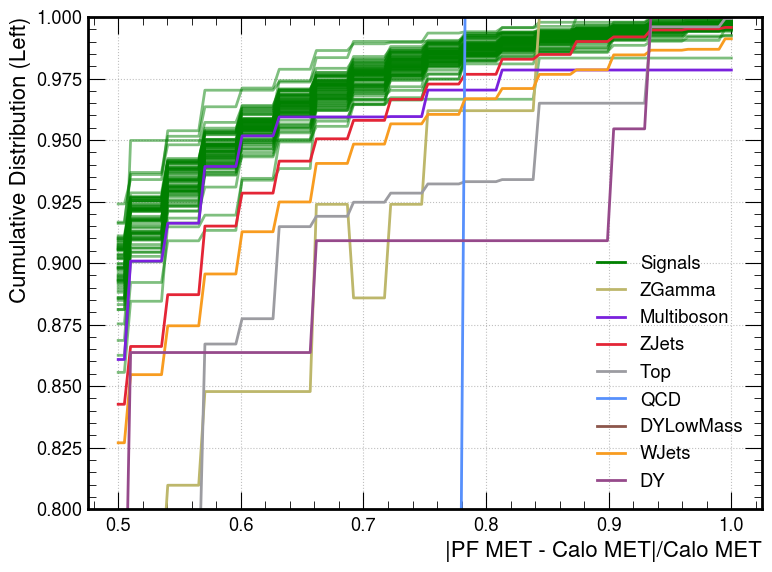

In [27]:
for i,CUT in enumerate(cuts):
    outD = f"plots_vtx_v8/cdfs/{CUT}/"
    outName = f"cdf_pfCaloMetRatio_allSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"|PF MET - Calo MET|/Calo MET"
    title = None
    hname = "pfCalo_metRatio"
    xlim = [0.5,1]
    ylim = [0.8,1]
    logy = False
    right = False
    ptools.make_cdf_summary_sigVsBkg(dfs,hcs,hcb,hname,hname,selection,outName,outD,xlabel=xlabel,
                                     save=False,show=True,right=right,title=title,xlim=xlim,ylim=ylim,logy=logy,)

# N-1 Plots

/uscms_data/d3/sbrightt/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMe/python_analysis/thesis_plots/eventSelection_study/../../analysisTools/plotTools.py:223: RuntimeWarning: invalid value encountered in divide
  effs = yields/n_tot
/uscms_data/d3/sbrightt/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMe/python_analysis/thesis_plots/eventSelection_study/../../analysisTools/plotTools.py:1079: RuntimeWarning: invalid value encountered in divide
  plt.plot(x,sig_yields/tot_bkg,color='green',alpha=0.5,lw=2)


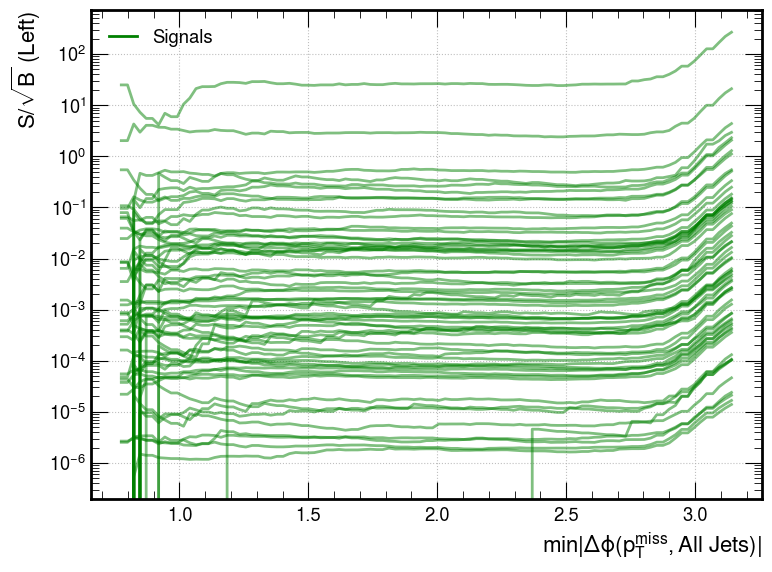

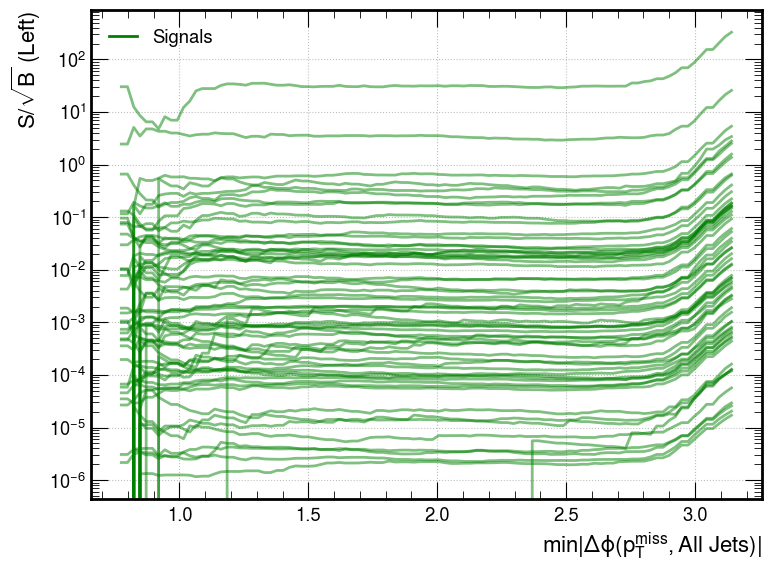

In [7]:
cuts = ['cut5','cut6']
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8/Nminus1/{CUT}/"
    outName = f"Nminus1_minJetMETdPhi"+f"allSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$\min|\Delta \phi(p_T^\text{miss},\text{All Jets})|$"
    title = None
    hname = "minJetMETdPhi"
    xlim = [0.75,np.pi]
    ylim = None
    right = False
    ptools.make_Nminus1_sigVsBkg(dfs,hcs,hcb,hname,hname,selection,outName,outD,xlabel=xlabel,
                              save=False,show=True,right=right,title=title,xlim=xlim,ylim=ylim,logy=True)

# Cutflows

In [20]:
cfs = hcs.load('cutflow_cts')
cfb = hcb.load('cutflow_cts')
cutDesc = hcs.load('cutDesc')
cuts,descs = [],[]
for c,d in cutDesc.items():
    cuts.append(c)
    descs.append(d)
from matplotlib import colormaps
cmap = list(colormaps['tab10'].colors) + list(colormaps['Dark2'].colors)
descs = ['Presel','GoodVtx','nJets < 3','b-veto',r'$|\eta_{j_0}| < 2.4$',
         r'$p_{T,j_0} > 80$',r"$\Delta\phi_\text{MET}^{j_0} > 2$",
         r"$\min\Delta\phi_\text{MET}^{j} > 0.75$",r"$M_{e^+e^-} > 0.1$"]

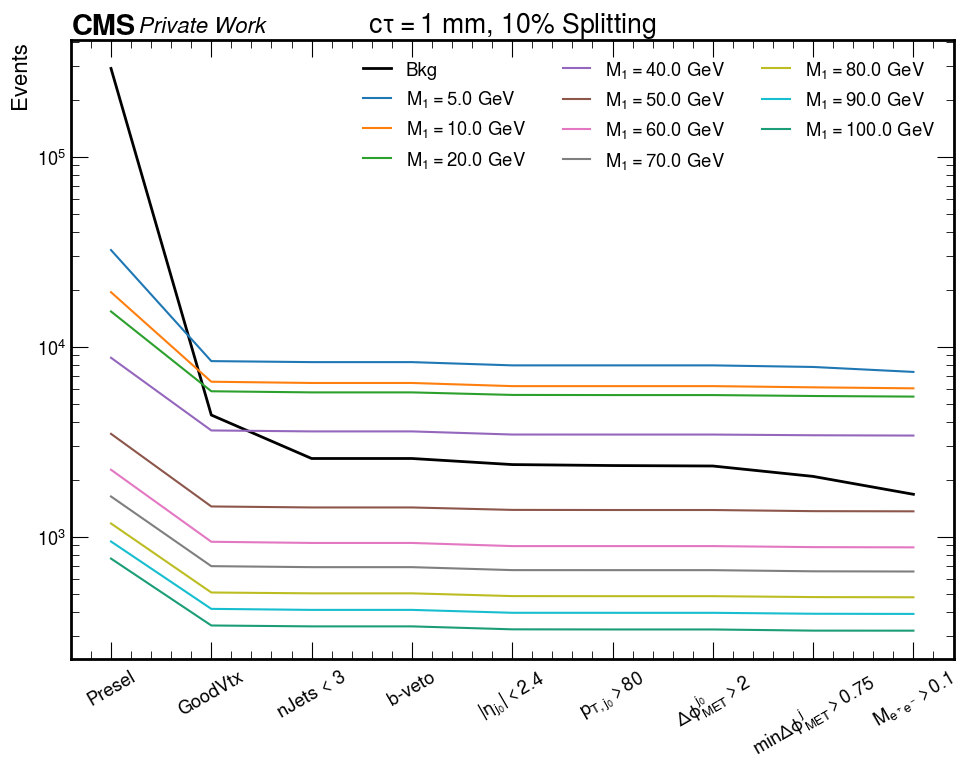

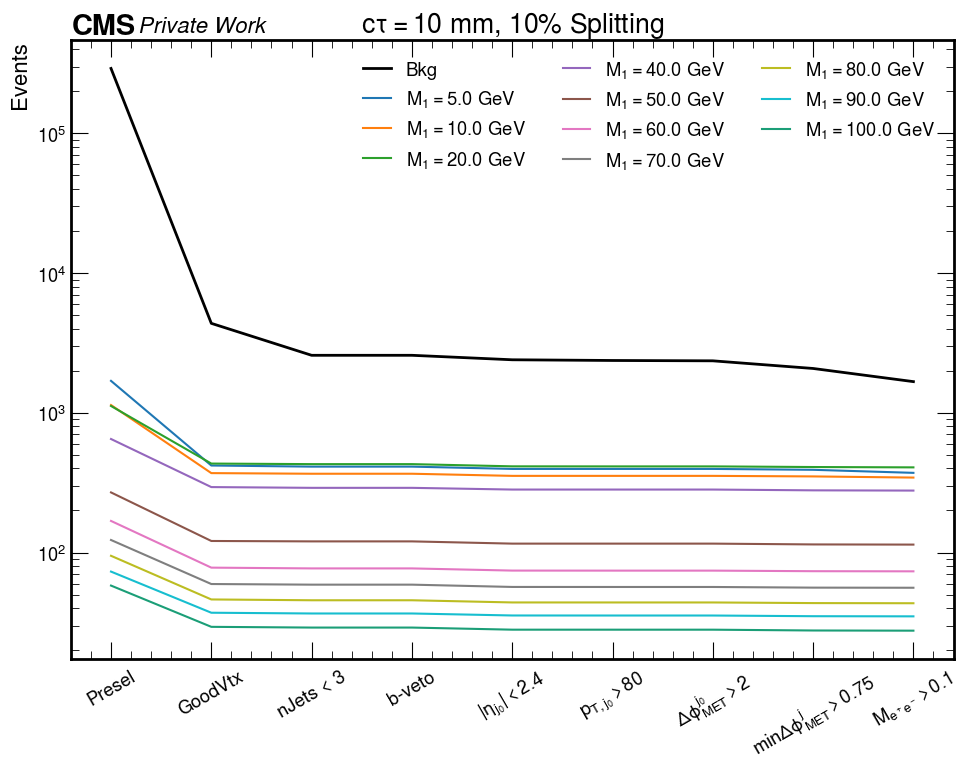

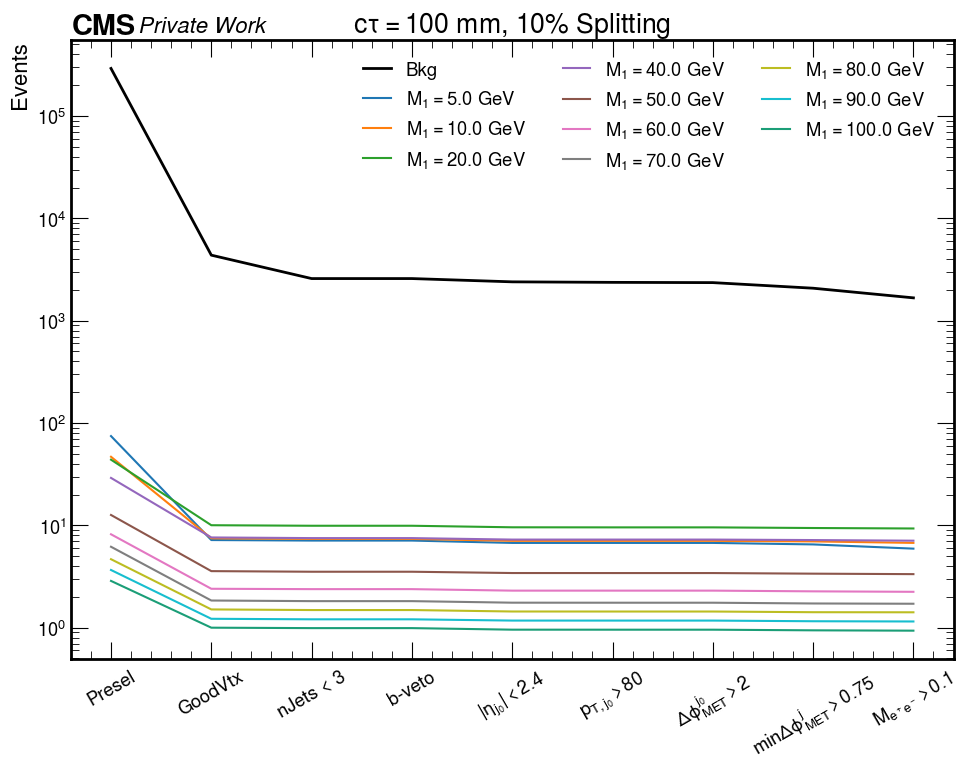

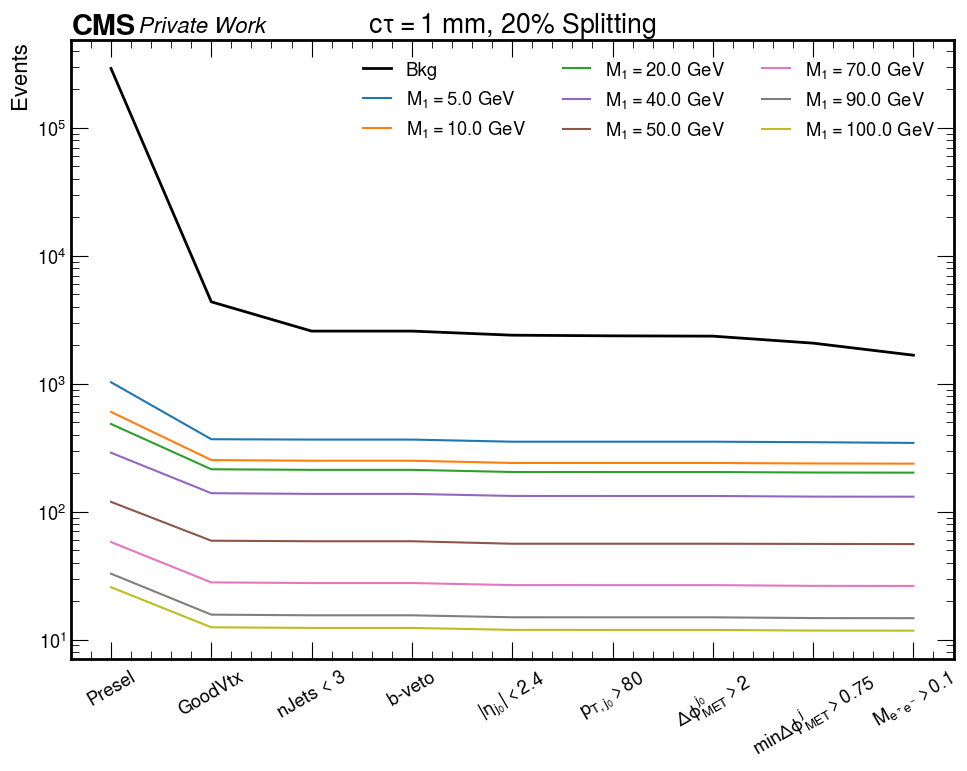

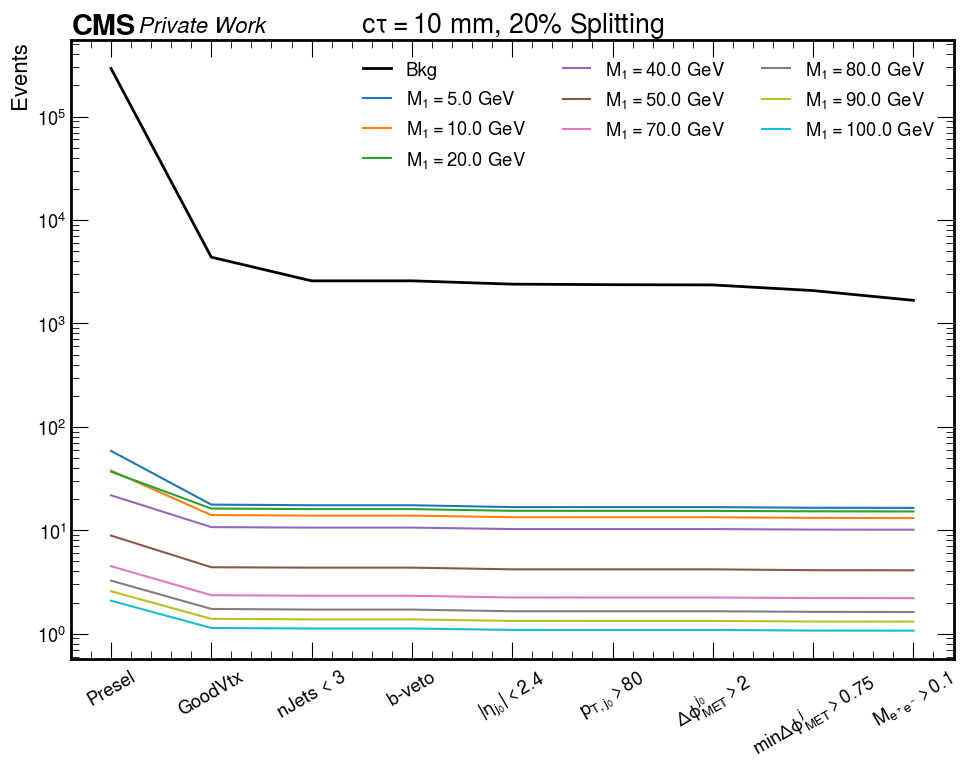

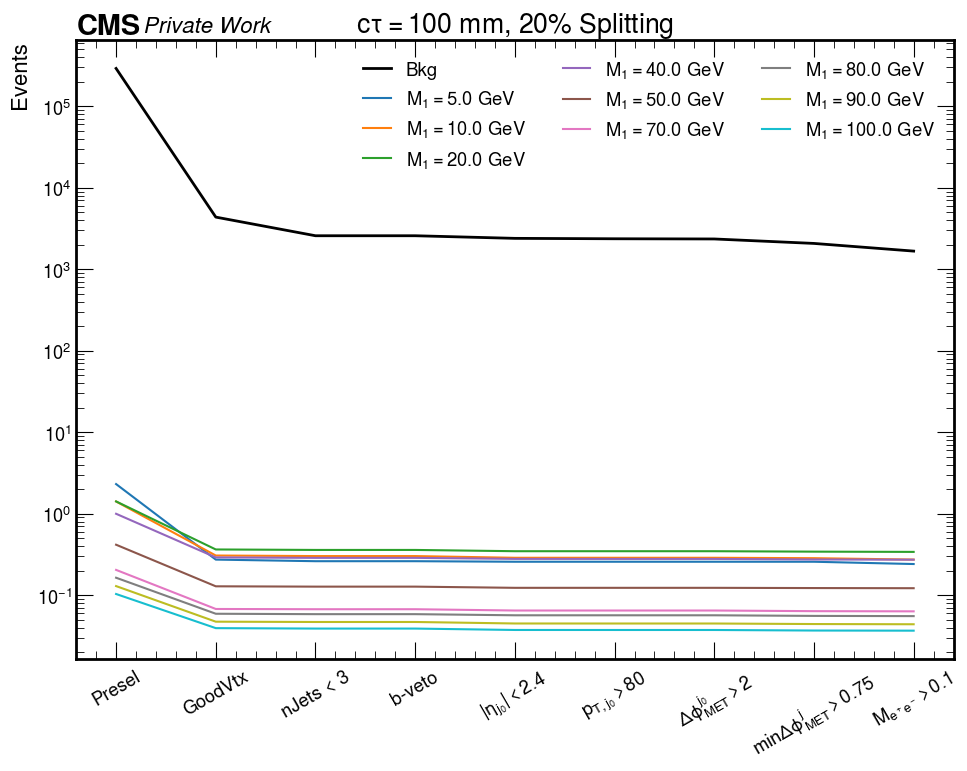

In [21]:
from matplotlib import colormaps
ctaus = [1,10,100]
deltas = [0.1,0.2]
for d in deltas:
    dfc = dfs[dfs.delta==d]
    for ct in ctaus:
        dfc2 = dfc[dfc.ctau==ct]
        m1s = sorted(list(set(dfc2.m1)))
        plt.figure(figsize=(10,8))
        bkg_line = [sum([cfb[b][cut] for b in cfb.keys()]) for cut in cuts]
        sig_cfLines = []
        for m1 in m1s:
            dfc3 = dfc2[dfc2.m1==m1]
            name = dfc3.name[0]
            sig_cf = cfs[name]
            line = []
            for cut in cuts:
                line.append(sig_cf[cut])
            sig_cfLines.append(line)
        plt.plot(np.arange(len(cuts)),bkg_line,lw=2,color='k',label="Bkg")
        for i,m1 in enumerate(m1s):
            if m1 ==30:
                continue
            plt.plot(np.arange(len(cuts)),sig_cfLines[i],color=cmap[i],label=rf"$M_1 = {m1}$ GeV")
        plt.xticks(np.arange(len(cuts)),labels=descs,rotation=30)
        plt.yscale('log')
        plt.title(rf"$c\tau = {int(ct)}$ mm, {int(100*d)}% Splitting")
        plt.ylabel("Events")
        #plt.ylim([None,1e6])
        plt.legend(loc='upper right',ncol=3)
        hep.cms.text("Private Work")
        plt.tight_layout()
        plt.savefig(f"plots_vtx_v8/cutflow/cutflow_delta{int(10*d)}_ct{ct}.pdf")

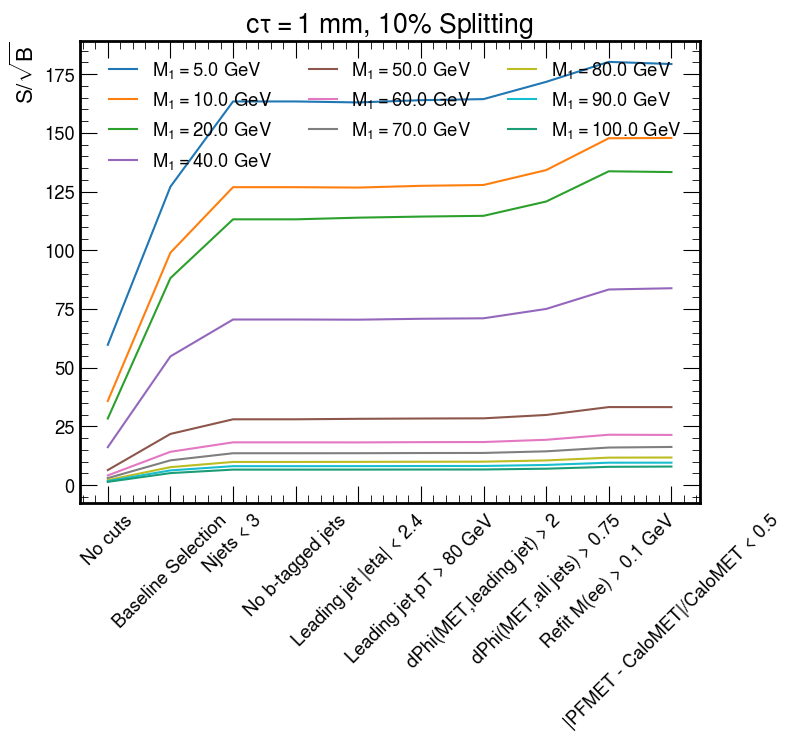

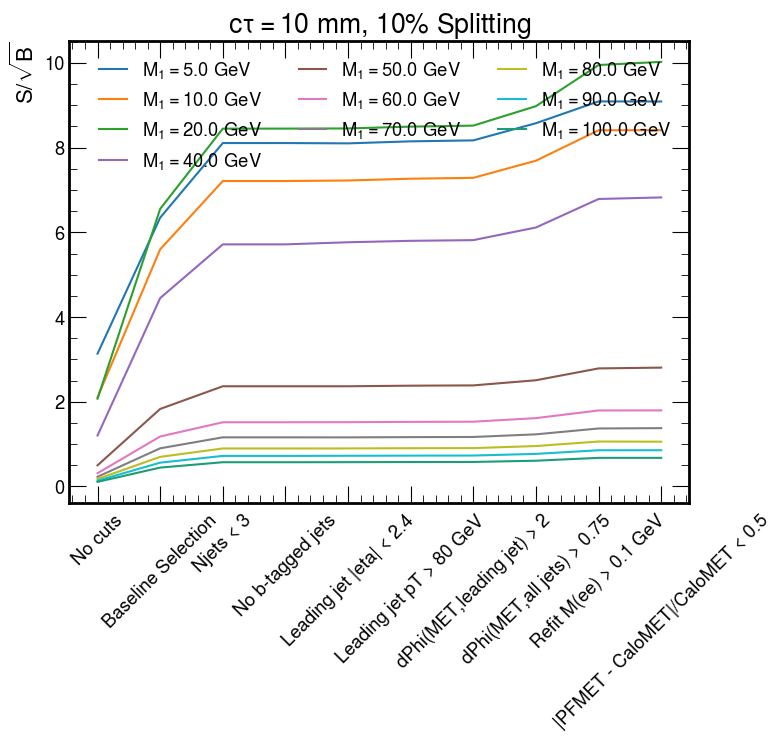

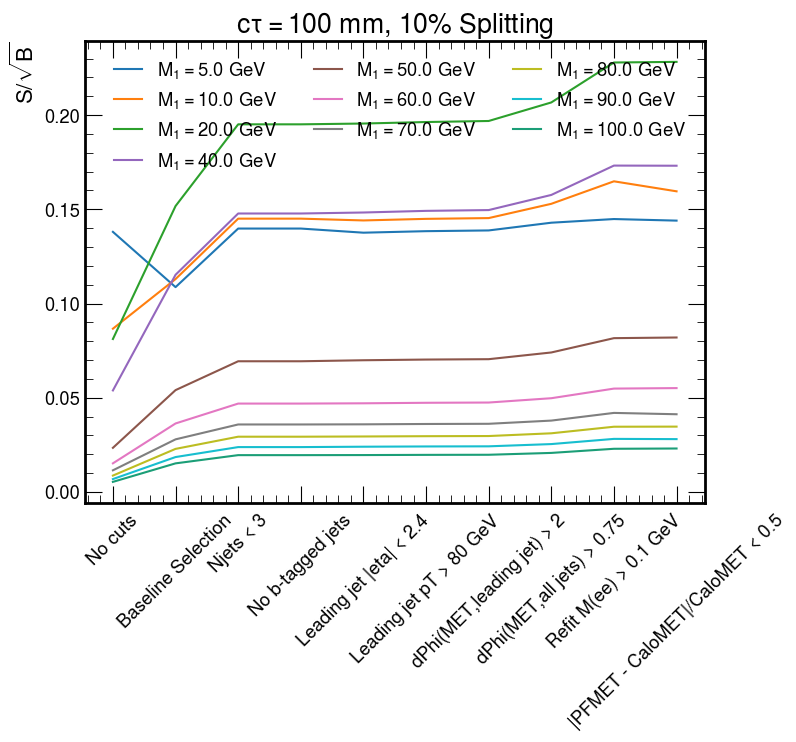

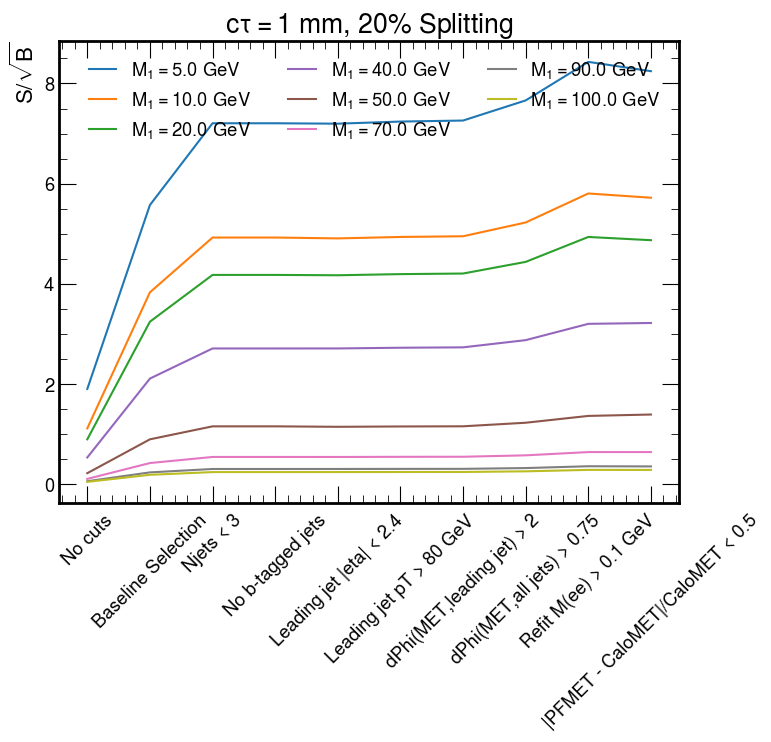

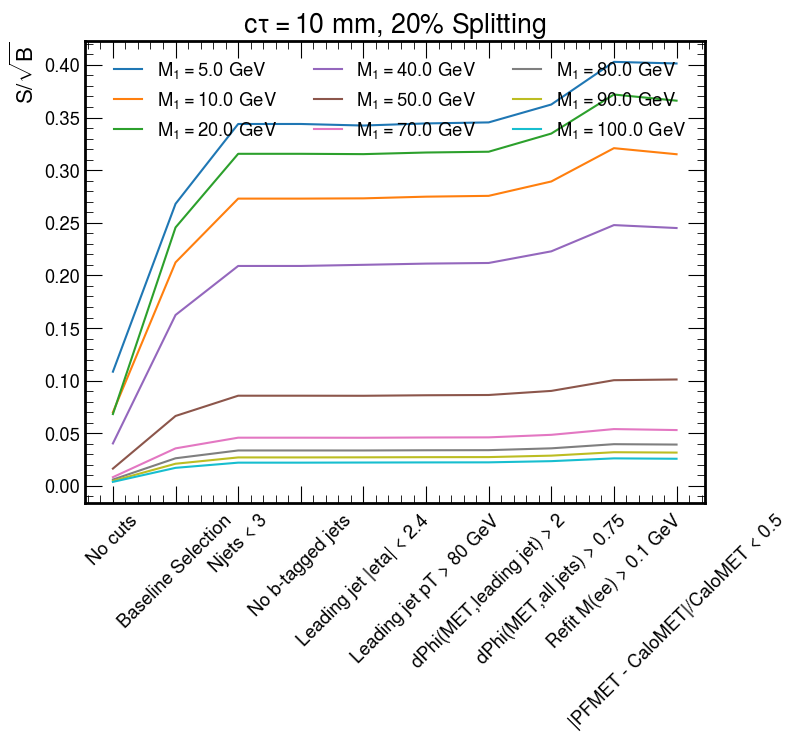

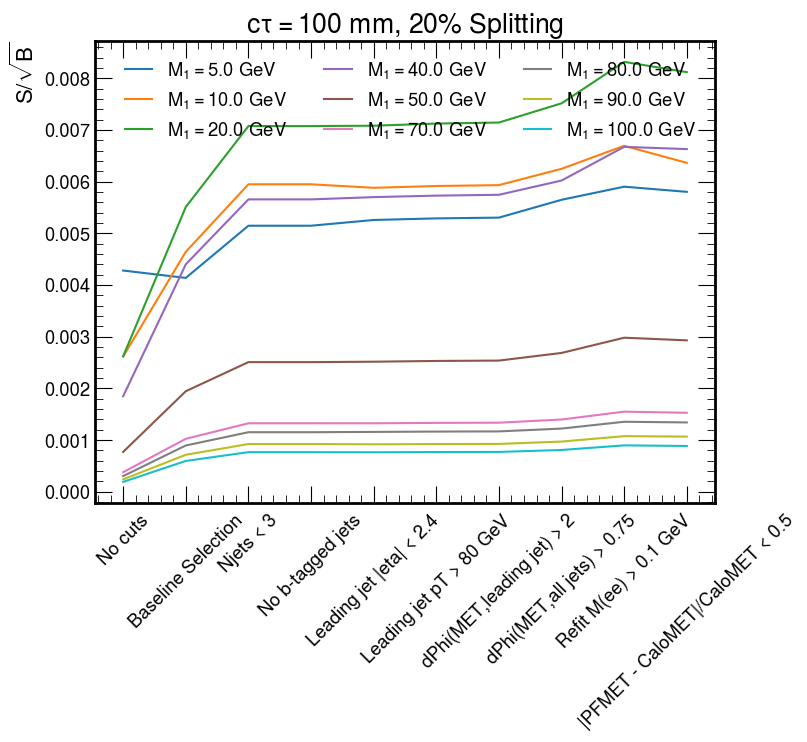

In [10]:
from matplotlib import colormaps
ctaus = [1,10,100]
deltas = [0.1,0.2]
for d in deltas:
    dfc = dfs[dfs.delta==d]
    for ct in ctaus:
        dfc2 = dfc[dfc.ctau==ct]
        m1s = sorted(list(set(dfc2.m1)))
        plt.figure(figsize=(8,6))
        bkg_line = [sum([cfb[b][cut] for b in cfb.keys()]) for cut in cuts]
        sig_cfLines = []
        for m1 in m1s:
            dfc3 = dfc2[dfc2.m1==m1]
            name = dfc3.name[0]
            sig_cf = cfs[name]
            line = []
            for cut in cuts:
                line.append(sig_cf[cut])
            sig_cfLines.append(line)
        bkg_line = np.array(bkg_line)
        sig_cfLines = [np.array(l) for l in sig_cfLines]
        #plt.plot(np.arange(len(cuts)),bkg_line,lw=2,color='k',label="Bkg")
        for i,m1 in enumerate(m1s):
            if m1==30:
                continue
            plt.plot(np.arange(len(cuts)),sig_cfLines[i]/np.sqrt(bkg_line),color=cmap[i],label=rf"$M_1 = {m1}$ GeV")
        plt.xticks(np.arange(len(cuts)),labels=descs,rotation=45)
        #plt.yscale('log')
        plt.title(rf"$c\tau = {int(ct)}$ mm, {int(100*d)}% Splitting")
        plt.ylabel(r"$S/\sqrt{B}$")
        #plt.ylim([None,1e6])
        plt.legend(loc='upper right',ncol=3)

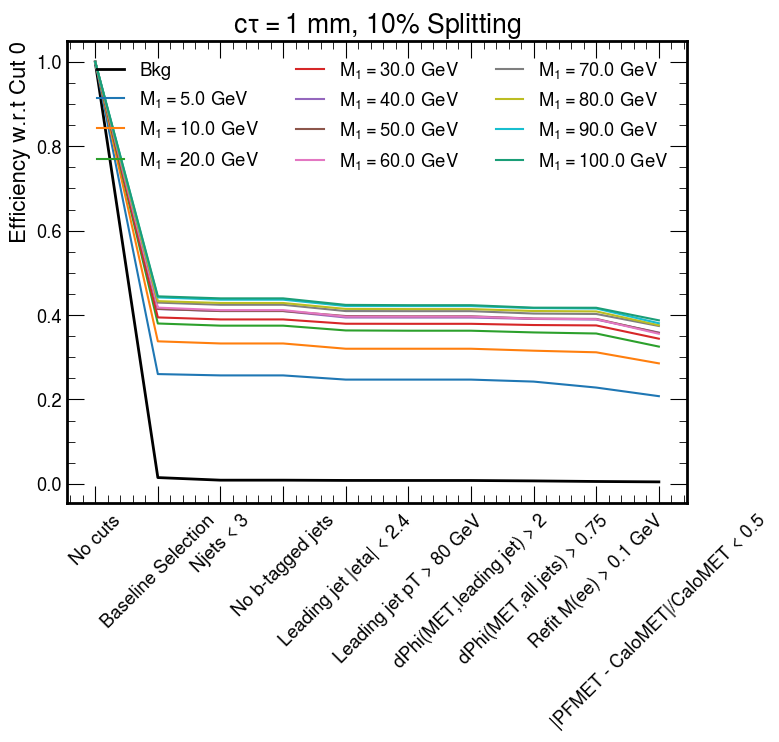

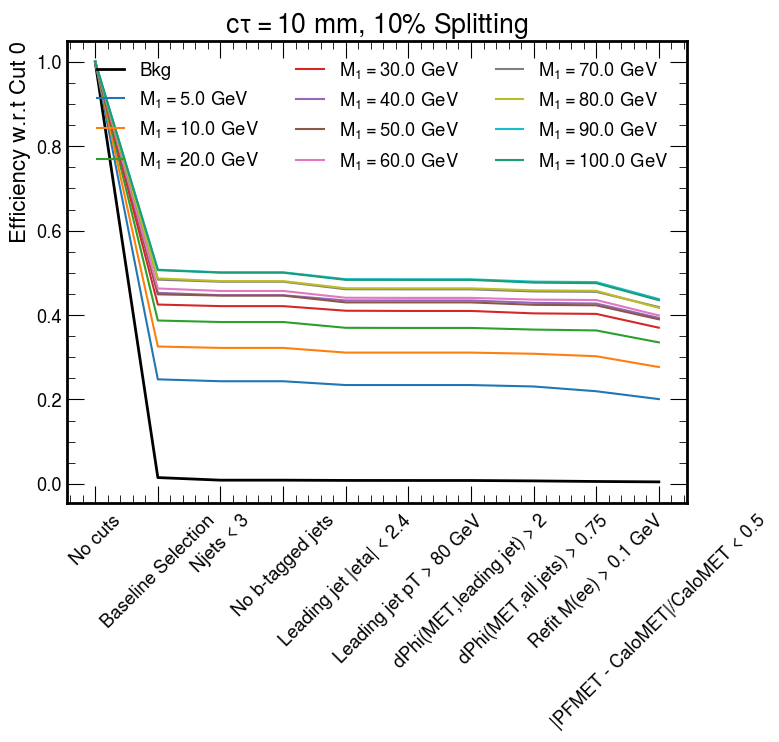

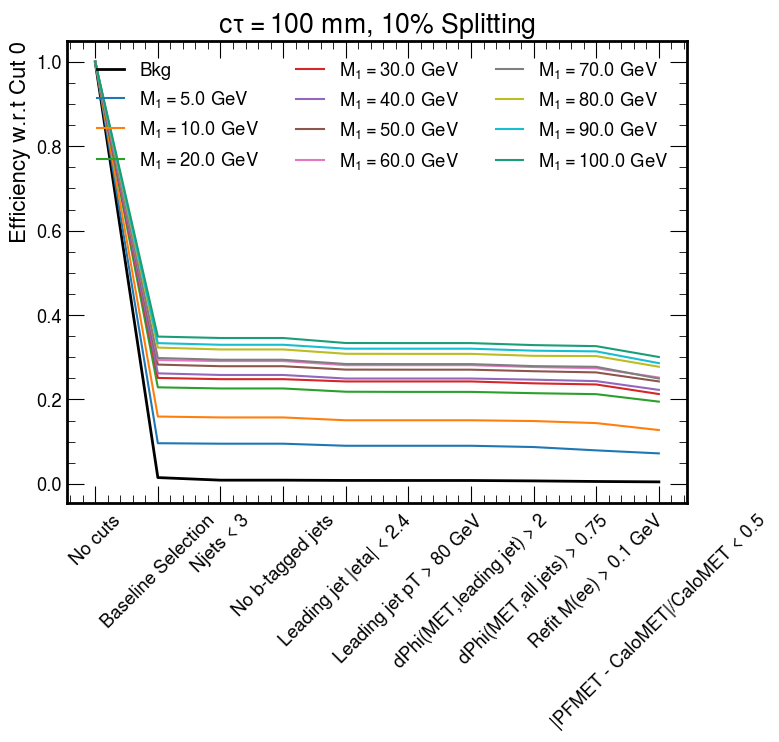

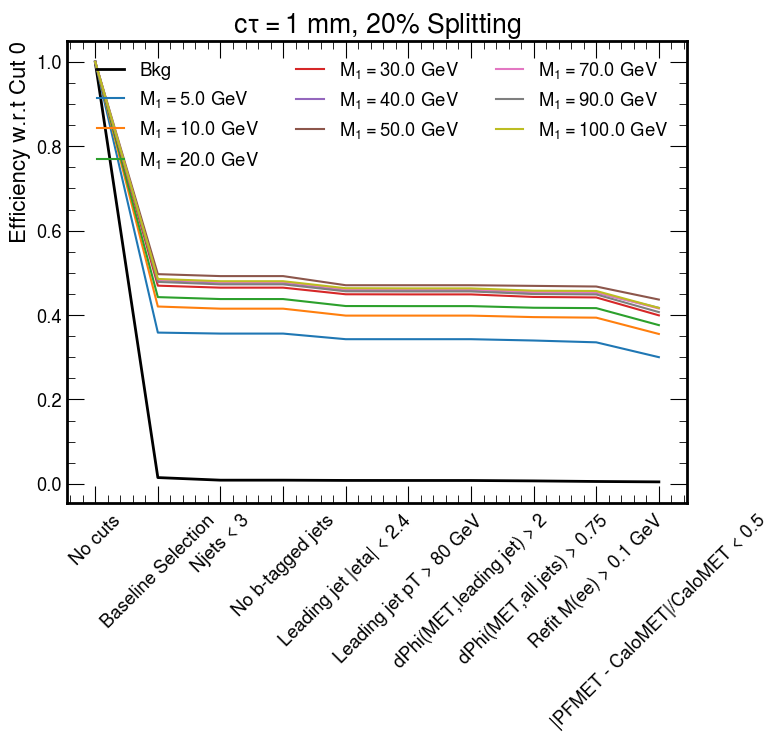

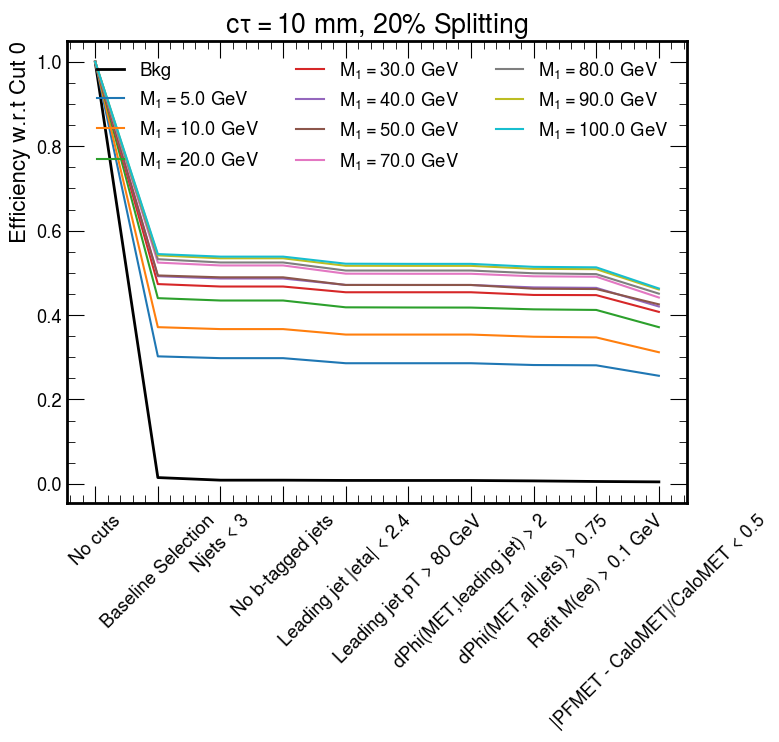

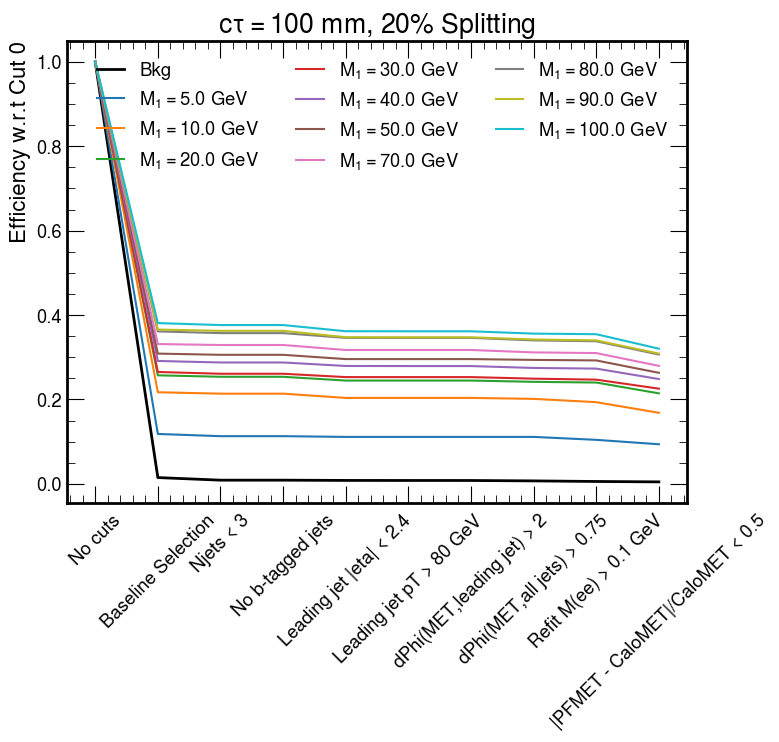

In [14]:
from matplotlib import colormaps
ctaus = [1,10,100]
deltas = [0.1,0.2]
for d in deltas:
    dfc = dfs[dfs.delta==d]
    for ct in ctaus:
        dfc2 = dfc[dfc.ctau==ct]
        m1s = sorted(list(set(dfc2.m1)))
        plt.figure(figsize=(8,6))
        bkg_line = [sum([cfb[b][cut] for b in cfb.keys()]) for cut in cuts]
        sig_cfLines = []
        for m1 in m1s:
            dfc3 = dfc2[dfc2.m1==m1]
            name = dfc3.name[0]
            sig_cf = cfs[name]
            line = []
            for cut in cuts:
                line.append(sig_cf[cut])
            sig_cfLines.append(line)
        bkg_line = np.array(bkg_line)
        sig_cfLines = [np.array(l) for l in sig_cfLines]
        plt.plot(np.arange(len(cuts)),bkg_line/bkg_line[0],lw=2,color='k',label="Bkg")
        for i,m1 in enumerate(m1s):
            plt.plot(np.arange(len(cuts)),sig_cfLines[i]/sig_cfLines[i][0],color=cmap[i],label=rf"$M_1 = {m1}$ GeV")
        plt.xticks(np.arange(len(cuts)),labels=descs,rotation=45)
        #plt.yscale('log')
        plt.title(rf"$c\tau = {int(ct)}$ mm, {int(100*d)}% Splitting")
        plt.ylabel(r"Efficiency w.r.t Cut 0")
        #plt.ylim([None,1e6])
        plt.legend(loc='upper right',ncol=3)

In [11]:
ptools.summedBkgCutflow(hcb,'cutflow_cts','cut7')

{'Multiboson': 24.32847823768704,
 'ZGamma': 15.923444488367554,
 'ZJets': 352.54198974947093,
 'Top': 66.88411146983348,
 'QCD': 8.29862377642862,
 'DYLowMass': 0.0,
 'WJets': 866.333897723714,
 'DY': 66.24287784766383}

# nJets plot with no cuts

In [3]:
hcs = ptools.histContainer("skimmed_signal_histos_noCuts_vtx_v8.coffea")
hcb = ptools.histContainer("skimmed_bkg_histos_noCuts_vtx_v8.coffea",bkg=True)
dfs = utils.get_dict_fromCutflow(hcs.load('cutflow'))
dfs['legend'] = dfs.apply(ptools.make_label,axis=1)
selected_signals = ["sig_2018_Mchi-10p5_dMchi-1p0_ctau-1",
                    "sig_2018_Mchi-52p5_dMchi-5p0_ctau-10",
                    "sig_2018_Mchi-22p0_dMchi-4p0_ctau-1",
                    "sig_2018_Mchi-44p0_dMchi-8p0_ctau-100"]
selected_labels = [dfs[dfs.name==s].legend.item() for s in selected_signals]

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


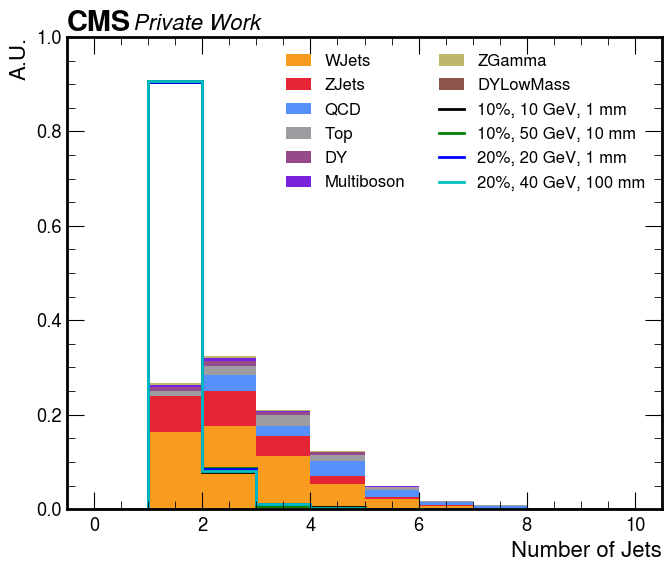

In [7]:
cuts = ['cut0']
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8_noCuts/observables/{CUT}/"
    outName = f"nJets"+f"_selectedSignals_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"Number of Jets"
    title = None
    hname = "nJets"
    xlim = None
    ylim = [0,1]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=True,show=True,logy=False,density=True,title=title,histtype='step',yerr=False,legend_loc='upper right')